# Methods for calculating the eigevalue density of matrix semicircle and of polynomials in free random variables

This is a collection of methods to calculate the eigenvalue distribution of matrix-valued semicircular random variable and of non-commutative self-adjoint polynomials in free random varriables, in particular in semicircle r.v.s. The methods are based on work of Belinschi, Rashidi Far, Helton, Mai, Speicher.

In [ ]:
import numpy as np
import numpy.linalg as la
from scipy.integrate import quad
from functools import partial
import seaborn as sns

from matplotlib import pyplot as plt, patches
from tqdm.notebook import tqdm, trange

%matplotlib inline
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Theoretical background and functions

(1) eta: First we realize the map $\eta: b \to \eta(b)$. This is the covariance function for the matrix semicircle $$S = a_1 s_1 + \ldots + a_k s_k,$$ where $a_1, \ldots, a_k$ are Hermitian matrices and $s_1, \ldots, s_k$ are free semicircle variables.  

(2a) hfs_map: Next step is to write the function that will be used to solve the equation for the matrix Cauchy transform $G(z)$, $$z G = 1 + \eta(G) G$$ by the method of iterations. The equation was derived by Speicher in R. Speicher, “Combinatorial theory of the free product with amalgamation and operator-valued free probability theory,” Mem. Amer. Math. Soc., vol. 132, no. 627, pp. x+88, 1998 . Another proof can be found in R. Rashidi Far, T. Oraby, W.Bryc, R. Speicher: “Spectra of large block matrices,” preprint 2006, cs.IT/0610045. Here the realization is for scalar $z \in \mathbb C$.

The simplest approach to equation on the Cauchy transform G is to use $$ G \to (z - \eta(G))^{-1}.$$ The arguments in Helton, Rashidi Far, Speicher:
"Operator-valued Semicircular Elements: Solving A Quadratic
Matrix Equation with Positivity Constraints."
IMRN 2007
suggest that from the numerical viewpoint it is beneficial  to use a slightly different scheme:
$$ G \to \frac{1}{2}\Big[G + (z - \eta(G))^{-1}\Big].$$


(3a) get_density: Then we define a function that calculate the density of a matrix semicircle at a point $x$.
This program calculate the matrix Cauchy transform by iterations, then reduces it to the scalar-valued Cauchy transform by taking normalized trace, and finally calculate the density by using the Stieltjes formula.

(2b) hfsb_map: This is a functions needed to solve a different version of the equation $$z G = 1 + \eta(G) G,$$ namely, suppose we are interested in the matrix $S = a_0 + a_1 X_1 + \ldots + a_n X_n$, where $X_i$ are semicircle r.v.s. For example,
$$
S =  \begin{bmatrix} 0 & X_1 & X_2 \\ X_1 & 0 & -1 \\ X_2 & -1 & 0 \end{bmatrix},
$$
where $X_1$ and $X_2$ are two standard semicircular variables. In this example, we have
$$
a_0 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & -1 & 0 \end{bmatrix}, \,
a_1 = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}, \,
a_2 = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{bmatrix}.
$$

This example is significantly different from the matrix semicircle because the matrix semicirle variable has non-trivial expectation.

First, we need to define an analogue of the hfs map, in order to be able to calculate the Cauchy transform $G_S(z) = G_{a_0 + X}$, where $X = a_1 \otimes X_1 + a_2 \otimes X_2$.
For this we define $b = z(z I - a_0)^{-1}$ and define the map (hfsb_map):
$$
G \mapsto \frac{1}{2}\Big[G + [z I - b \eta(G)]^{-1} b\Big].
$$
This should be iterated to convergence.

(3b) get_density_B: uses the hsfb_map to calculate the G-transform and density
of a biased matrix semicircle.

(2c) hfsc_map: Often we use the biased matirx semicircle variable to compute the distribution of an hermitian non-commutative polynomial in semicircular variables. In order to find this distribution, note that we need to calculate $G(z, b(z))$, where
$$
b_\epsilon(z) = z(\Lambda_\epsilon(z) - a_0)^{-1},
$$
$\epsilon > 0$ is a small regularization paremater, and
$$
\Lambda_\epsilon(z) := \begin{bmatrix}
 z & 0 & \ldots & 0 \\
0 & i\epsilon & \ldots & 0 \\
\vdots & \vdots & \, & \vdots \\
0 & 0 & \ldots & i\epsilon
\end{bmatrix}.
$$
By definition,
$$
G(z, b) = m_0(b)z^{-1} + m_1(b) z^{-2} + m_2(b) z^{-3} + \ldots,
$$
and $m_k(b)$ are moments:
$$
m_k(b) := E[b(Xb)^k] = E[bXb \ldots Xb].
$$

Once $G(z, b(z))$ is calculated, we can calculate the Cauchy transform of the polynomial $p$ by using formula
$$
\phi[(z - p)^{-1}] = \lim_{\epsilon \to 0} \Big[ G(z, b_\epsilon(z)) \Big]_{1,1}.
$$


Finally, we can extract the density by the Stieljes inversion formula.

For the first step we will modify a little bit the hsfb_map, and the modified version is hsfc_map.

(3c) get_density_C: This is the function that uses iterations of hsfc_map to
calculate the Cauchy transform and the density of the polynomial in semicircular variables. It requires coefficients in the linearization of the polynomial, it will not construct the linearization for you.

(4) random_semicircle: We will check that the free probability methods give a good approximation to Gaussian block matrices. So we also define a basic block for these matrices.

(5) Lambda: In calculation of the distribution of polynomials we will also need function
$$
\Lambda_\epsilon(z) := \begin{bmatrix}
 z & 0 & \ldots & 0 \\
0 & i\epsilon & \ldots & 0 \\
\vdots & \vdots & \, & \vdots \\
0 & 0 & \ldots & i\epsilon
\end{bmatrix}
$$

(6) G_semicircle: In some calculations, we need the Cauchy transform of the standard semicircle variable.

(7) G-matrix semicircle: This is the function that computes the matrix Cauchy transform of $b \otimes S$ where $S$ is a semicircle random variable. This is
a relatively sophisticated method. For more simple methods based on integration and regularization approaches, see the example about anticommutator via subordination below.

Take unitary matrices $U_1$ and $U_2$ so that
 $$
 U_1^\ast B U_2 = \begin{bmatrix}
 D & 0 \\ 0 & 0,
 \end{bmatrix}
 $$
 where $D = diag \{\lambda_1, \ldots, \lambda_r\}$ is an invertible diagonal $r\times r$ matrix, and $0$'s  represent matrices of appropriate dimensions. For self-adjoint $B$ we can take $U_1 = U_2$.

Let
$$
   U_1^\ast A U_2 = \begin{bmatrix}a_{11} & a_{12} \\ a_{21} & a_{22}
   \end{bmatrix},
$$
where $a_{11}$ is an $r\times r$ matrix and let
$$
S := a_{11} - a_{12} a_{22}^{-1} a_{21}.
$$
Then
\begin{equation}
%\label{equ_matrix_G1}
G_{B\otimes x}(A) = E (A - B\otimes x)^{-1}  = U_2
\begin{bmatrix} I & 0 \\ -  a_{22}^{-1} a_{21} & I
\end{bmatrix}  M \begin{bmatrix} I &  -  a_{12} a_{22}^{-1} \\ 0 & I
\end{bmatrix} U_1^\ast,
\end{equation}
where
$$
 M = \begin{bmatrix}E (S - D \otimes x)^{-1} & 0 \\ 0 & a_{22}^{-1}\end{bmatrix}.  
 $$



 It remains to calculate $E (S - D \otimes x)^{-1}$, and since $D$ is an invertible diagonal matrix, we can apply our original approach. Let us assume that $D^{-1} S$ is diagonalizable (this will hold for a generic $A$), then we can write
 $$
 D^{-1} S = V \begin{bmatrix}\mu_1 & &  \\  &\ddots & \\ & & \mu_r
 \end{bmatrix} V^{-1},
 $$
 and
\begin{equation}
%\label{equ_matrix_G2}
 E \big[(S - D\otimes X)^{-1}\big] =  E \big[(D^{-1} S - I \otimes X)^{-1}\big] D^{-1} =
 V \begin{bmatrix}G_x(\mu_1) & &  \\  &\ddots & \\ & & G_x(\mu_r)
 \end{bmatrix} V^{-1} D^{-1}.
 \end{equation}

(8) H_matrix_Semicircle: $H_{B \otimes S}(w) = G_{B \otimes S}^{-1}(w) - w$.

(9) omega: Matrix subordination function. Recall that $\omega_1(b)$ is the fixed point of the map
$$
w \to h_y(h_x(w) + b) + b.
$$
where $h_x(w) = F_x(w) - w$ and $h_y(w) = F_y(w) - w$, and $F_x, F_y$ are inverses of the corresponding Cauchy transforms.

Given that $\omega_1(b)$ is calculated, we can find the Cauchy transform for the sum $x + y$ as
$$
G_{x + y}(b) = G_x(\omega_1(b)).
$$

We realize $\omega_1(b)$ as a function $\omega\big(b, (a_1, a_2)\big)$. This version of omega is only for semicircle variables $x = a_1 \otimes S_1$ and $y = a_2 \otimes S_2$.  

(10) G_free_Poisson: Cauchy transform of the free Poisson distribution with parameter $\lambda$.

(11) G_matrix_fpoisson: Matrix version of the Cauchy transform for the free Poisson r.v. with parameter $\lambda$.

(12) H_matrix_fpoisson: $G^{-1}(w) - w$.

(13) omega_sum: computes the subordination function $\omega_1$ for the sum of two matrix random variables, not necessarily semicircle. Requires H-functions for these random variables.

(14) random_fpoisson: generates a random matrix with free Poisson distribution.

(15) random_orthogonal: generates a random orthogonal matrix

(16) G_matrix_custom: This is a function that calculates the matrix Cauchy transform, provided that the scalar Cauchy transform is known.

(17) H_matrix_custom: The H-function that corresponds to G_matrix_custom

(18) cauchy_transform_discrete: The scalar Cauchy transform of an arbitrary discrete distribution.

0.0
[[0.+1.e+00j 0.+0.e+00j 0.+0.e+00j]
 [0.+0.e+00j 0.+1.e-06j 0.+0.e+00j]
 [0.+0.e+00j 0.+0.e+00j 0.+1.e-06j]]
Cauchy transform at (3+4j) is (0.11252218193910513-0.1621967291648141j)
Cauchy transform for array [(3+4j), (1+1j), (3-4j), (1-1j)] is [0.11252218-0.16219673j 0.25706586-0.52908551j 0.11252218+0.16219673j
 0.25706586+0.52908551j]
G_matrix_semicircle =  [[ 6.89420617e-17-6.18033989e-01j  0.00000000e+00+0.00000000e+00j
  -6.89420617e-17+6.61117662e-17j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-1.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 7.66135141e-17-9.34290615e-17j  0.00000000e+00+0.00000000e+00j
  -7.66135141e-17-6.18033989e-01j]]
H_matrix_semicircle =  [[ 1.80492661e-16+6.18033989e-01j  0.00000000e+00+0.00000000e+00j
  -1.80492661e-16+1.73082851e-16j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 2.00576784e-16-2.44600459e-16j -0.00000000e+00+0.00000000e+00j
  -2.00576784e-16+6.18033989e-01j]]
[[ 

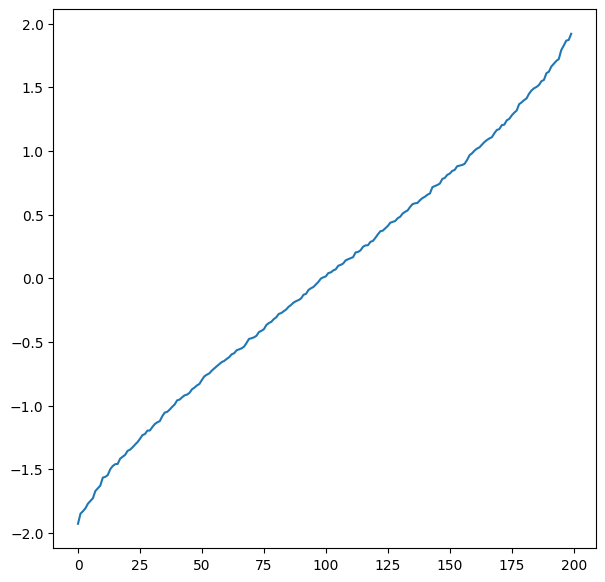

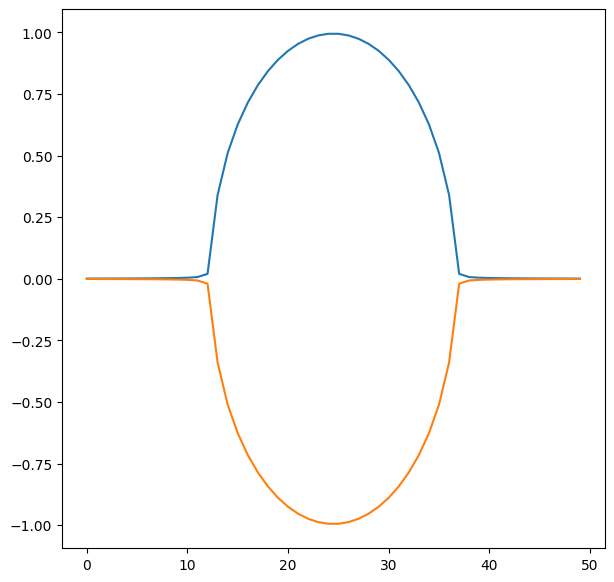

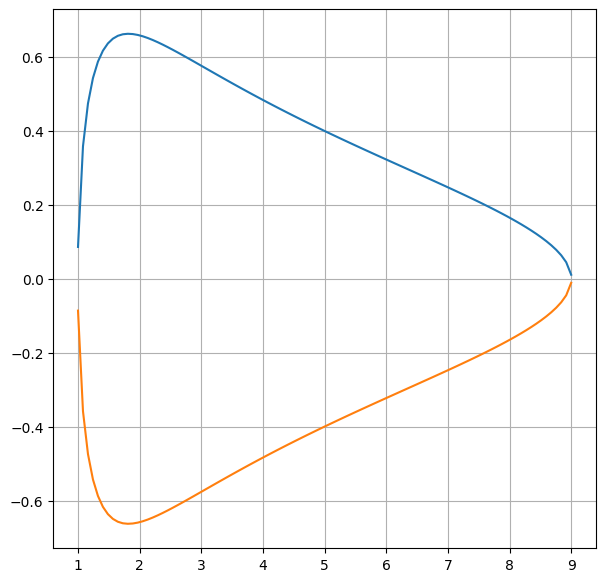

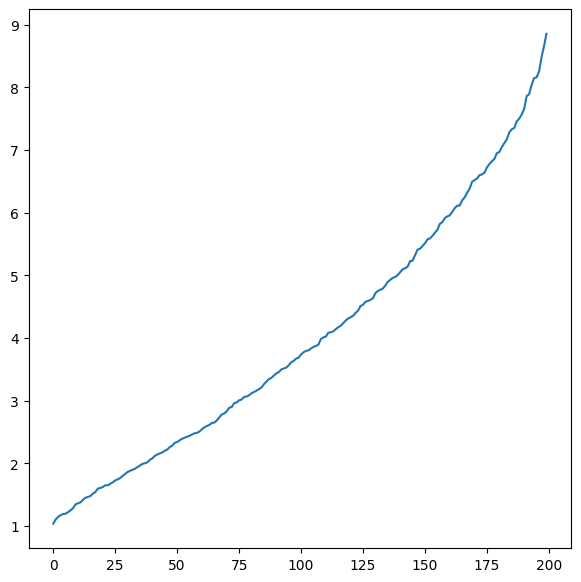

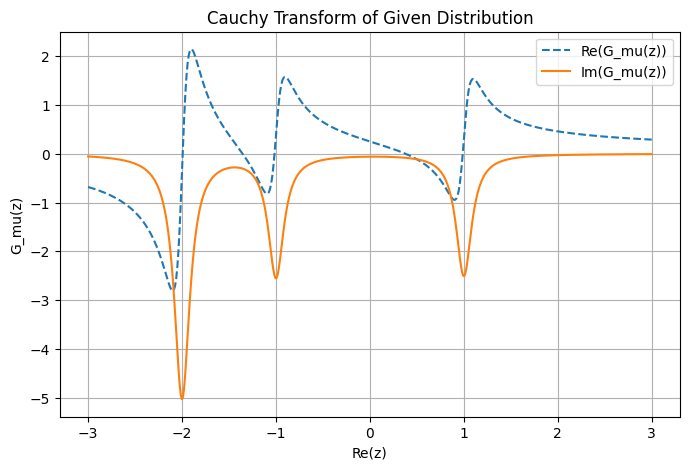

In [ ]:
#(1) covariance map
def eta(B, AA):
  '''
  AA is a list or a tuple of Hermitian matrices A_1, \ldots, A_k
  B is sent to A_1 B A_1 + \ldots + A_k B A_k
  '''
  n = B.shape[0]
  s = len(AA)
  result = np.zeros((n, n), dtype = np.float32)
  for i in range(s):
    result = result + AA[i] @ B @ AA[i]
  return result

#(2a) Iteration step needed to calculate the cauchy transform for
# a matrix semicircle r.v.
def hfs_map(G, z, AA):
  ''' G is a matrix, z is a complex number with positive imaginary part,
  G is mapped to a smoothed version of $(z - \eta(G))^{-1}$. AA is a list of matrices
  needed to define the function $\eta$.
  '''
  n = G.shape[0]
  #return la.inv(z * np.eye(n) - eta(G, AA))
  return (G + la.inv(z * np.eye(n) - eta(G, AA)))/2

#(3a) A function that calculates the Cauchy transform and the distribution
#density for a matrix semicircle r.v.
def get_density(x, AA, eps=0.01, max_iter=10000):
  ''' Calculate the density at the real point x, given the data
  in the tuple of matrices $AA = (A1, \ldots, As)$
  Uses eps as the distance of the point $x + i eps$ from the
  real axis.
  '''
  z = x + 1j * eps
  n = AA[0].shape[0]
  G = 1/z * np.eye(n) #initialization
  diffs = np.zeros((max_iter, 1))
  for i in range(max_iter):
    G1 = hfs_map(G, z, AA)
    diffs[i] = la.norm(G1 - G)
    if la.norm(G1 - G) < 1e-10:
      break
    G = G1
    if i == max_iter - 1:
      print("Warning: no convegence after ", max_iter, "iterations")
  f = (-1/np.pi) * np.imag(np.trace(G)/n)
  #plt.plot(diffs) #this is for diagnostic purposes
  #plt.yscale("log")
  return f


#(2b) the main iteration steps in the calculation of the density for a
#biased matrix semicircle
def hfsb_map(G, z, a, AA):
  ''' G is a matrix, z is a complex number with positive imaginary part,
  a is a bias matrix, AA is a list of matrices
  needed to define the function $\eta$.
  '''
  n = G.shape[0]
  b = z * la.inv(z * np.eye(n) - a)
  W = la.inv(z * np.eye(n) - b @ eta(G, AA)) @ b
  return (G + W)/2
  #return W

#(3b) calculates the Cauchy transform and the density of a biased matrix semicircle
def get_density_B(x, a, AA, eps=0.01, max_iter=10000):
  ''' Calculate the density at the real point x, given the data
  in the tuple of matrices $AA = (A1, \ldots, As)$, and the bias matrix a.
  Uses eps as the distance of the point $x + i eps$ from the
  real axis.
  '''
  z = x + 1j * eps
  n = AA[0].shape[0]
  G = 1/z * np.eye(n) #initialization
  diffs = np.zeros((max_iter, 1))
  for i in range(max_iter):
    G1 = hfsb_map(G, z, a, AA)
    diffs[i] = la.norm(G1 - G)
    if la.norm(G1 - G) < 1e-14:
      break
    G = G1
    if i == max_iter - 1:
      print("Warning: no convegence after ", max_iter, "iterations")
  f = (-1/np.pi) * np.imag(np.trace(G)/n)
  #plt.plot(diffs) #this is for diagnostic purposes
  #plt.yscale("log")
  return f


#(2c) An iteration step in the calculation of the Cauchy transform
# and the density for a polynomial in semicircle r.v.s.
def hfsc_map(G, z, a, AA):
  ''' G is a matrix, z is a complex number with positive imaginary part,
  a is a bias matrix, AA is a list of matrices
  needed to define the function $\eta$.
  '''
  n = G.shape[0]
  b = z * la.inv(Lambda(z, n) - a)
  W = la.inv(z * np.eye(n) - b @ eta(G, AA)) @ b
  return (G + W)/2
  #return W

#(3c) A function that computes the Cauchy transform and the density for
#a polynomial in semicircle r.v.s.
def get_density_C(x, a, AA, eps=0.01, max_iter=10000):
  ''' Calculate the density at the real point x, given the data
  in the tuple of matrices $AA = (A1, \ldots, As)$, and the bias matrix a.
  Uses eps as the distance of the point $x + i eps$ from the
  real axis.
  '''
  z = x + 1j * eps
  n = AA[0].shape[0]
  G = 1/z * np.eye(n) #initialization
  diffs = np.zeros((max_iter, 1))
  for i in range(max_iter):
    G1 = hfsc_map(G, z, a, AA)
    diffs[i] = la.norm(G1 - G)
    if la.norm(G1 - G) < 1e-12:
      break
    G = G1
    if i == max_iter - 1:
      print("Warning: no convegence after ", max_iter, "iterations")
  f = (-1/np.pi) * np.imag(G[0, 0])
  #plt.plot(diffs) #this is for diagnostic purposes
  #plt.yscale("log")
  return f

#(4) creates a random Hermitian Gaussian matrix with approximately semicircle
# distribution.
def random_semicircle(size):
  '''generate a random Hermitian Gaussian matrix of size n-by-n normalized by 1/sqrt(n),
  where n = size'''
  random_matrix = np.random.randn(size, size)
  return (random_matrix + random_matrix.T)/( np.sqrt(2 * size))

#Example of usage:
size = 200
A = random_semicircle(size)
print(la.norm(A - A.T))
e = la.eigvalsh(A)
plt.plot(e)
np.trace(A * A)

def Lambda(z, size, eps = 1E-6):
  ''' Lambda_eps(z) needed to calculate the distribution of a polynomial
  of free random variables.'''
  A = eps * 1.j * np.eye(size)
  A[0, 0] = z
  return A

print(Lambda(1.j, 3))

def G_semicircle(z):
    """
    Computes the Cauchy transform of the semicircle distribution for a given complex number z,
    ensuring that if z has a positive imaginary part, the output has a negative imaginary part,
    and vice versa.

    Parameters:
        z (complex or array-like): The point(s) at which to evaluate the Cauchy transform.

    Returns:
        complex or ndarray: The value(s) of the Cauchy transform at z.
    """
    z = np.asarray(z, dtype=np.complex128)  # Ensure input is treated as complex

    # Compute the discriminant
    discriminant = np.sqrt(z**2 - 4)

    # Ensure the output's imaginary part has the desired symmetry
    discriminant = np.where(discriminant.imag * z.imag < 0, -discriminant, discriminant)

    # Compute the Cauchy transform
    G = (z - discriminant) / 2

    return G

# Example usage
z = 3 + 4j  # Example input
result = G_semicircle(z)
print(f"Cauchy transform at {z} is {result}")

# Test with an array of values
z_array = [3 + 4j, 1 + 1j, 3 - 4j, 1 - 1j]
result_array = G_semicircle(z_array)
print(f"Cauchy transform for array {z_array} is {result_array}")

plt.figure()
z = np.linspace(-4,4) - 0.01j
plt.plot(np.imag(G_semicircle(z)))
z = np.linspace(-4,4) + 0.01j
plt.plot(np.imag(G_semicircle(z)))


def G_matrix_semicircle(w, B, rank):
  ''' computes G(w) for the semicirle B \otimes x,
  rank is the rank of matrix B '''
  w = np.asarray(w, dtype=np.complex128)  # Ensure input is treated as complex
  n = B.shape[0]
  U1, d, U2t = la.svd(B)
  U2 = np.conj(U2t.T)
  #print("U1 =", U1)
  #print(d)
  #print("U2 =", U2)
  #print("should be D: ", np.conj(U1.T) @ B @ U2) #
  A_transf = np.conj(U1.T) @ w @ U2
  #print("A_transf = ", A_transf)

  A11 = A_transf[0:rank, 0:rank]
  A12 = A_transf[0: rank, rank:n]
  A21 = A_transf[rank:n, 0: rank]
  A22 = A_transf[rank:n, rank:n]
  D = np.diag(d[0:rank])
  #print("D = ", D)
  S = A11 - A12 @ la.inv(A22) @ A21
  #print('S = ', S)
  mu, V = la.eig(la.inv(D) @ S)
  #print('mu =', mu)
  #print(V)
  #print('S = ', V @ np.diag(mu) @ la.inv(V))
  #print("G(mu) = ", G_semicircle(mu))
  M11 = V @ np.diag(G_semicircle(mu)) @ la.inv(V) @ la.inv(D)
  #print('M11 = ', M11)
  M = np.block([[M11, np.zeros((rank, n - rank))], [np.zeros((n - rank, rank)), la.inv(A22)]])
  #print("M = ", M)
  G = U2 @ (np.block([[np.eye(rank), np.zeros((rank, n - rank))], [-  la.inv(A22) @ A21 , np.eye(n - rank)]])
       @ M  @ np.block([[np.eye(rank), -A12 @ la.inv(A22)], [np.zeros((n - rank, rank)), np.eye(n - rank)]]))  @ np.conj(U1.T)
  return(G)

def H_matrix_semicircle(w, B, rank):
  ''' This is the h function: h = G(w)^{-1} - w$ '''
  return(la.inv(G_matrix_semicircle(w, B, rank)) - w)


n = 3
rank = 2
A1 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
z = (0.0 + 1j)
w = z * np.eye(n)

G = G_matrix_semicircle(w, A1, rank)
print("G_matrix_semicircle = ", G)

H = H_matrix_semicircle(w, A1, rank)
print("H_matrix_semicircle = ", H)

def omega(b, AA, rank, max_iter = 10000):
  ''' This computes subordination function for the sum of two semicircle variables.
  AA = (A1, A2), rank is a (rank1, rank2), where rank1 is the rank of matrix A1,
  and rank2 is the rank of matrix A2.
  '''
  W0 = 1.j * np.eye(n) #(initialization)
  A1 = AA[0]
  A2 = AA[1]
  for i in range(max_iter):
    W1 = H_matrix_semicircle(W0, A1, rank = rank[0]) + b
    W2 = H_matrix_semicircle(W1, A2, rank = rank[1]) + b
    if la.norm(W2 - W0) < 1e-12:
      break
    W0 = W2
    if i == max_iter - 1:
      print("Warning: no convergence after ", max_iter, "iterations")
  return W0

#an example
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)
n = A0.shape[0]

z = .5 + .01j
B = Lambda(z, n) - A0
print(B)

print('result = ', omega(B, AA, rank = (2, 2)))

#(10) Cauchy transform of free Poisson
def G_free_poisson(z, lambda_param):
    """
    Explicit formula for the Cauchy transform of the free Poisson distribution
    with parameter λ.

    Args:
        z (complex): The point at which to evaluate the Cauchy transform.
        lambda_param (float): The parameter λ of the free Poisson law.

    Returns:
        G (complex): The value of the Cauchy transform G(z).
    """

    z = np.asarray(z, dtype=np.complex128)  # Ensure input is treated as complex
    # Compute the interval [a, b] of the support
    a = (1 - np.sqrt(lambda_param))**2
    #print(a)
    b = (1 + np.sqrt(lambda_param))**2
    #print(b)

    # Compute the square root term with correct branch
    sqrt_term = np.sqrt((z - a) * (z - b))
    #sqrt_term = np.sqrt((1 + z - lambda_param)**2 - 4 * z) #alternative expression

    sqrt_term = np.where(sqrt_term.imag * z.imag < 0, -sqrt_term, sqrt_term)

    # Explicit formula for the Cauchy transform
    G = (1 + z - lambda_param - sqrt_term) / (2 * z)
    if lambda_param < 1: #in this case G also has an atom at 0 with weight (1 - lambda)
      G = G + (1 - lambda_param)/z

    return G



lambda_param = 4  # Set λ (parameter of the free Poisson law)
z = 3 + 1j          # Complex number at which to evaluate G(z)

# Compute the Cauchy transform
G_z = G_free_poisson(z, lambda_param)
print(f"Cauchy transform G({z}) for λ={lambda_param}: {G_z}")

#visualization

plt.figure()
#z = np.linspace(-4,4) - 0.01j
#plt.plot(np.imag(G_free_poisson(z, 2)))
m = 100
al = (1 - np.sqrt(lambda_param))**2
au = (1 + np.sqrt(lambda_param))**2
x =  np.linspace(al,au, m)
z = x - 0.01j
plt.plot(x, np.imag(G_free_poisson(z, lambda_param)))
z = x + 0.01j
plt.plot(x, np.imag(G_free_poisson(z, lambda_param)))
plt.grid()

#let's check that this corresponds to a valid density function.
f = - np.imag(G_free_poisson(z, lambda_param))/np.pi
print(sum(f)* (au - al)/m)


# (11) Matrix version of the Cauchy transform for the free Poisson random variable.
def G_matrix_fpoisson(w, B, rank, lambda_param):
  ''' computes G(w) for the free Poisson r.v. B \otimes x,
  rank is the rank of matrix B '''
  w = np.asarray(w, dtype=np.complex128)  # Ensure input is treated as complex
  n = B.shape[0]
  U1, d, U2t = la.svd(B)
  U2 = np.conj(U2t.T)
  A_transf = np.conj(U1.T) @ w @ U2

  A11 = A_transf[0:rank, 0:rank]
  A12 = A_transf[0: rank, rank:n]
  A21 = A_transf[rank:n, 0: rank]
  A22 = A_transf[rank:n, rank:n]
  D = np.diag(d[0:rank])
  S = A11 - A12 @ la.inv(A22) @ A21
  mu, V = la.eig(la.inv(D) @ S)
  M11 = V @ np.diag(G_free_poisson(mu, lambda_param)) @ la.inv(V) @ la.inv(D)
  M = np.block([[M11, np.zeros((rank, n - rank))], [np.zeros((n - rank, rank)), la.inv(A22)]])
  G = U2 @ (np.block([[np.eye(rank), np.zeros((rank, n - rank))], [-  la.inv(A22) @ A21 , np.eye(n - rank)]])
       @ M  @ np.block([[np.eye(rank), -A12 @ la.inv(A22)], [np.zeros((n - rank, rank)), np.eye(n - rank)]]))  @ np.conj(U1.T)
  return(G)

def H_matrix_fpoisson(w, B, rank, lambda_param):
  ''' This is the h function: h = G(w)^{-1} - w$ '''
  return(la.inv(G_matrix_fpoisson(w, B, rank, lambda_param)) - w)


#(13) subordination function for the sum of two matrix random variables.
def omega_sub(b, AA, rank, H1_name="H_matrix_semicircle", H2_name="H_matrix_semicircle",
              H1_kwargs=None, H2_kwargs=None, max_iter=10000):
    '''
    Computes subordination function omega_1(b) for the sum of two free random variables variables.

    AA = (A1, A2), where A1 and A2 are matrices.
    rank = (rank1, rank2), where rank1 is the rank of matrix A1, and rank2 is the rank of matrix A2.
    H1_name, H2_name are string names of the functions to be applied.
    H1_kwargs, H2_kwargs are dictionaries containing additional arguments for H1 and H2.
    '''
    n = AA[0].shape[0]  # Assuming A1 and A2 are square matrices of the same size
    W0 = 1.j * np.eye(n)  # Initialization
    A1, A2 = AA

    # Get function references from globals()
    H1 = globals()[H1_name]
    H2 = globals()[H2_name]

    # Initialize kwargs dictionaries if None
    if H1_kwargs is None:
        H1_kwargs = {}
    if H2_kwargs is None:
        H2_kwargs = {}

    for i in range(max_iter):
        W1 = H1(W0, A1, rank=rank[0], **H1_kwargs) + b
        W2 = H2(W1, A2, rank=rank[1], **H2_kwargs) + b

        if la.norm(W2 - W0) < 1e-12:
            break
        W0 = W2

        if i == max_iter - 1:
            print("Warning: no convergence after", max_iter, "iterations")

    return W0

#(14) generator of a free Poisson matrix
def random_fpoisson(size, lam):
  '''generate a random Hermitian matrix of size n-by-n, where n = size, that have the free Poisson
  distribution with parameter lambda.
  '''
  random_matrix = np.random.randn(size, int(np.floor(size * lam)))
  return (random_matrix @ random_matrix.T) /size

#Example of usage:
size = 200
lam = 4
A = random_fpoisson(size, lam)
print(la.norm(A - A.T))
e = la.eigvalsh(A)
plt.figure()
plt.plot(e)
np.trace(A)/size

#(15) random orthogonal matrix
def random_orthogonal(n):
    # Step 1: Generate a random n x n matrix A
    A = np.random.randn(n, n)

    # Step 2: Perform QR decomposition on A
    Q, R = np.linalg.qr(A)

    # Q is the orthogonal matrix we want
    return Q

# Example usage
n = 3  # Dimension of the matrix
Q = random_orthogonal(n)
print("Random Orthogonal Matrix Q:\n", Q)

# (16) This is a function that calculates the matrix Cauchy transform, provided that
#the scalar Cauchy transform is known.
def G_matrix_custom(w, B, rank, G_name="G_semicircle", G_kwargs=None):
  ''' computes G(w) for the r.v. B \otimes x, where x has a custom measure mu_x above,
  with the scalar Cauchy transform function $G_name$, and
  rank is the rank of matrix B '''

  # Get function references from globals()
  G = globals()[G_name]

  # Initialize kwargs dictionaries if None
  if G_kwargs is None:
    G_kwargs = {}


  w = np.asarray(w, dtype=np.complex128)  # Ensure input is treated as complex
  n = B.shape[0]
  U1, d, U2t = la.svd(B)
  U2 = np.conj(U2t.T)
  A_transf = np.conj(U1.T) @ w @ U2

  A11 = A_transf[0:rank, 0:rank]
  A12 = A_transf[0: rank, rank:n]
  A21 = A_transf[rank:n, 0: rank]
  A22 = A_transf[rank:n, rank:n]
  D = np.diag(d[0:rank])
  S = A11 - A12 @ la.inv(A22) @ A21
  mu, V = la.eig(la.inv(D) @ S)
  M11 = V @ np.diag(G(mu, **G_kwargs)) @ la.inv(V) @ la.inv(D)
  M = np.block([[M11, np.zeros((rank, n - rank))], [np.zeros((n - rank, rank)), la.inv(A22)]])
  G = U2 @ (np.block([[np.eye(rank), np.zeros((rank, n - rank))], [-  la.inv(A22) @ A21 , np.eye(n - rank)]])
       @ M  @ np.block([[np.eye(rank), -A12 @ la.inv(A22)], [np.zeros((n - rank, rank)), np.eye(n - rank)]]))  @ np.conj(U1.T)
  return(G)

# (17) The H-function that corresponds to G_matrix_custom
def H_matrix_custom(w, B, rank, G_name="G_semicircle", G_kwargs=None):
  ''' This is the h function: h = G(w)^{-1} - w$ '''
  return(la.inv(G_matrix_custom(w, B, rank, G_name, G_kwargs)) - w)

n = 3
rank = 2
A1 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
z = (0.0 + 1j)
w = z * np.eye(n)

G = G_matrix_custom(w, A1, rank, G_name="G_semicircle")
print("G_matrix_custom = ", G)

H = H_matrix_custom(w, A1, rank,  G_name="G_semicircle")
print("H_matrix_custom = ", H)


#(18) The scalar Cauchy transform of an arbitrary discrete distribution
def cauchy_transform_discrete(z, points, weights):
    """
    Computes the Cauchy transform G_mu(z) for a measure defined by
    discrete points and their corresponding weights.

    Parameters:
    z : complex or array-like
        Evaluation point(s) in the complex plane.
    points : list or array-like
        Locations of the discrete measure.
    weights : list or array-like
        Corresponding weights of the measure.
    """
    z = np.asarray(z)[:, np.newaxis]  # Ensure z is a column vector
    points = np.asarray(points)
    weights = np.asarray(weights)
    return np.sum(weights / (z - points), axis=1)

# Example usage
points = np.array([-2, -1, 1])  # Support points
weights = np.array([2/4, 1/4, 1/4])  # Corresponding weights
z_values = np.linspace(-3, 3, 500) + 0.1j  # Evaluate on the upper half-plane
G_values = cauchy_transform_discrete(z_values, points, weights)

# Plot real and imaginary parts
plt.figure(figsize=(8, 5))
plt.plot(z_values.real, G_values.real, label="Re(G_mu(z))", linestyle='dashed')
plt.plot(z_values.real, G_values.imag, label="Im(G_mu(z))")
plt.xlabel("Re(z)")
plt.ylabel("G_mu(z)")
plt.legend()
plt.title("Cauchy Transform of Given Distribution")
plt.grid()
plt.show()

## Example 1 (Eigenvalue distribution of a matrix semicircle).

Let us try an example (borrowed from Mai-Speicher) $$ b = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} $$
$$ a_1 = \begin{bmatrix} 0 & 2 i & 0 \\ -2i & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}, \,
a_2 = \begin{bmatrix} 0 & 0 & i \\ 0 & 0 & 0 \\ -i & 0 & 0 \end{bmatrix}, \,
a_3 = \begin{bmatrix} 0 & i & 0 \\ -i & 0 & -i \\ 0 & i & 0 \end{bmatrix}
$$
The matrix $S$ is then
$$
S = i \begin{bmatrix} 0 & 2s_1 + s_3 & s_2 \\ -2s_1 - s_3 & 0 & -s_3 \\ -s_2 & s_3 & 0 \end{bmatrix}
$$

In [ ]:
B = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float32)
print(B)
A1 = 2.j * np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 0]])
print(A1)
A2 = 1.j * np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
A3 = 1.j * np.array([[0, 1, 0], [-1, 0, -1], [0, 1, 0]])
AA = (A1, A2, A3)
etaB = eta(B, AA)
etaB

[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 0.+0.j  0.+2.j  0.+0.j]
 [-0.-2.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]]


array([[ 0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j]])

Let us try the itetative method for solving the basic equation and iterate it to convergence.

[[0.-5.00908884e+00j 0.+0.00000000e+00j 0.+4.54215075e-03j]
 [0.+0.00000000e+00j 0.-5.00833194e+00j 0.+0.00000000e+00j]
 [0.+4.54215075e-03j 0.+0.00000000e+00j 0.-5.02725745e+00j]]


  0%|          | 0/150 [00:00<?, ?it/s]

[[0.-0.35294988j 0.+0.j         0.+0.34328879j]
 [0.+0.j         0.-0.35533106j 0.+0.j        ]
 [0.+0.34328879j 0.+0.j         0.-1.72610503j]]


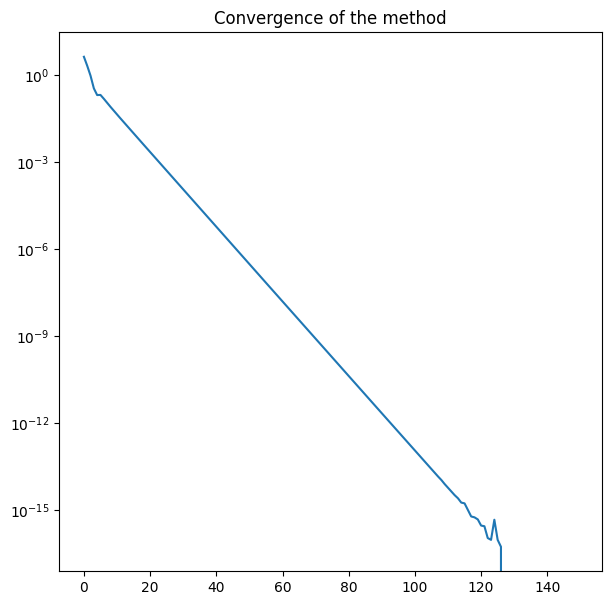

In [ ]:
z = .01j
n = 3
G0 = .1/z * np.eye(n)
G = hfs_map(G0, z, AA)
print(G)

max_iter = 150
diffs = np.zeros((max_iter, 1))
for i in trange(max_iter):
  G1 = hfs_map(G, z, AA)
  diffs[i] = la.norm(G1 - G)
  G = G1
plt.plot(diffs)
plt.yscale("log")
plt.title("Convergence of the method")
print(G)

In [ ]:
f = get_density(0., AA)
print(f)

0.2582963750368427


Let us get the plot of the density. Two interesting features: (1) the density is symmetric.

(2) the density might have a singularity at zero. -- I am not actually sure about this.

0.9894832024366176


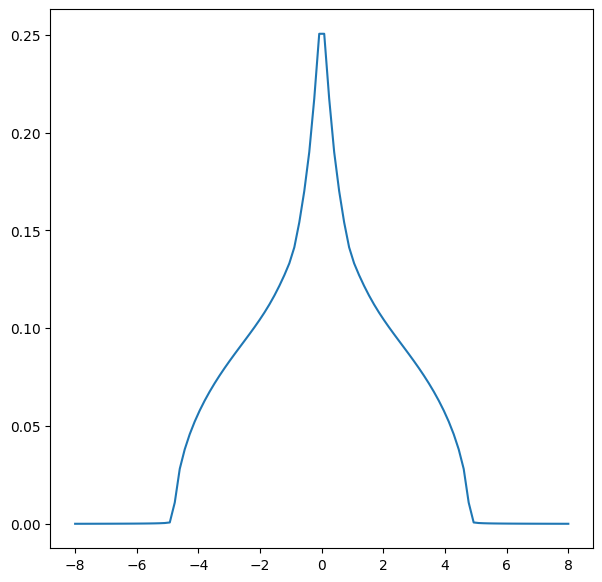

In [ ]:
a = 8
m = 100
XX = np.linspace(-a, a, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
  f[i] = get_density(x, AA)

print(sum(f)*2*a/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)


Let us now see if this aggrees with numerical data from simulations. Recall that matrix $S$ is
$$
S = i \begin{bmatrix} 0 & 2s_1 + s_3 & s_2 \\ -2s_1 - s_3 & 0 & -s_3 \\ -s_2 & s_3 & 0 \end{bmatrix}
$$
We will build it using our basic blocks and calculate eigenvalues. We will repeat it T times and plot the histogram of the results.

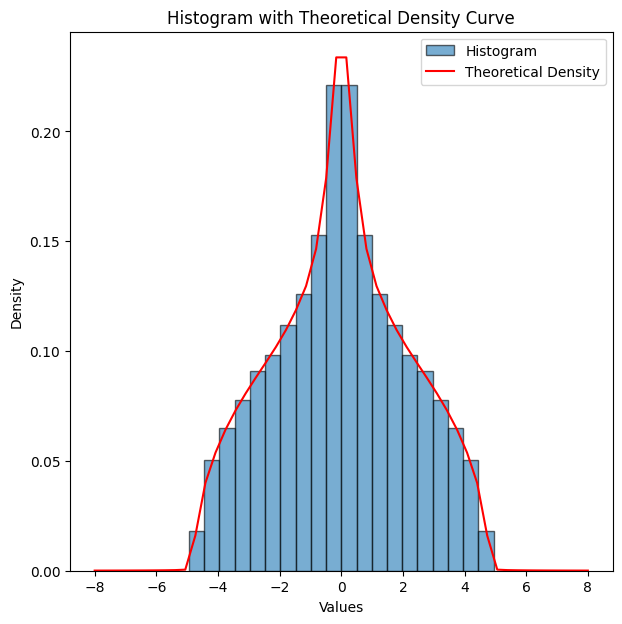

In [ ]:
size = 200
zero_m = np.zeros((size, size))
T = 10
EE = np.zeros((3 * size,T))
for count in range(T):
  S1 = random_semicircle(size)
  S2 = random_semicircle(size)
  S3 = random_semicircle(size)
  S = 1.j * np.block([[zero_m, 2 * S1 + S3, S2], [-2 * S1 - S3, zero_m, -S3], [-S2, S3, zero_m]])
  #la.norm(S - np.conj(S.T))
  e = la.eigvalsh(S)
  EE[:,count] = e

EE = EE.reshape(-1)

#plt.plot(EE)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=20, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()



## Example 2: Toeplitz Semicircle Matrix

Here we will be interested in the matrix
$$
S =  \begin{bmatrix} A & B & C \\ B & A & B \\ C & B & A \end{bmatrix},
$$
where $A$, $B$, and $C$ are free semicircular. In this case we have
$$
a_1 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \,
a_2 = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix}, \,
a_3 = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{bmatrix}.
$$

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[0 1 0]
 [1 0 1]
 [0 1 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
0.9887484960048565


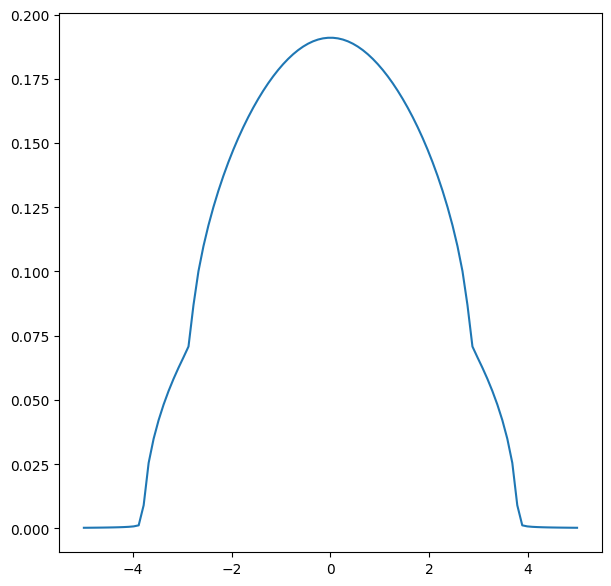

In [ ]:
A1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
A2 = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
A3 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A1)
print(A2)
print(A3)
AA = (A1, A2, A3)
a = 5
XX = np.linspace(-a, a, 100)
m = XX.size
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
  f[i] = get_density(x, AA)

print(sum(f)*2*a/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)

Now we will check this result using numerical simulations

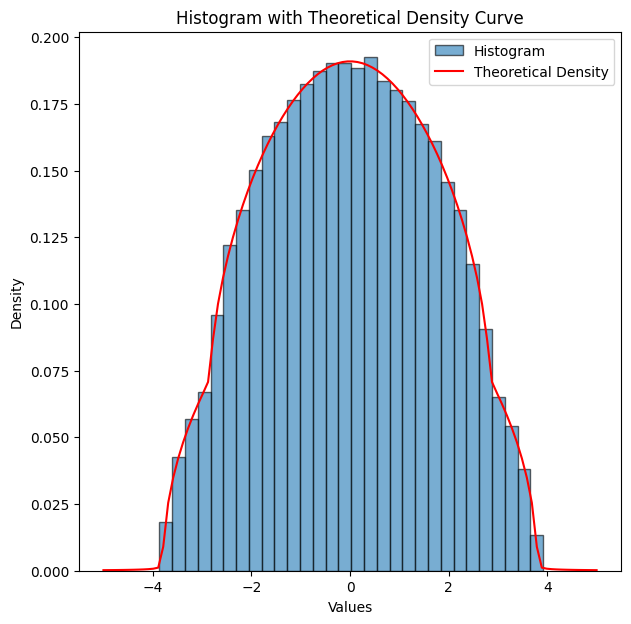

In [ ]:
size = 200
zero_m = np.zeros((size, size))
T = 30
EE = np.zeros((3 * size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_semicircle(size)
  C = random_semicircle(size)
  S = np.block([[A, B, C], [B, A, B], [C, B, A]])
  #la.norm(S - np.conj(S.T))
  e = la.eigvalsh(S)
  EE[:,count] = e

EE = EE.reshape(-1)

#plt.plot(EE)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()


## Example 3a: This is the matrix semicircle that arises in the study of the anti-commutator

Here we will be interested in the matrix
$$
S =  \begin{bmatrix} 0 & X_1 & X_2 \\ X_1 & 0 & -1 \\ X_2 & -1 & 0 \end{bmatrix},
$$
where $X_1$ and $X_2$ are two standard semicircular variables. In this case we have
$$
a_0 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & -1 & 0 \end{bmatrix}, \,
a_1 = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}, \,
a_2 = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{bmatrix}.
$$

This example is significantly different from the previous example because the matrix semicirle variable has non-trivial expectation.

First, we need to define an analogue of the hfs map, in order to be able to calculate the Cauchy transform $G_S(z) = G_{a_0 + X}$, where $X = a_1 \otimes X_1 + a_2 \otimes X_2$.
For this we define $b = z(z I - a_0)^{-1}$ and define the map:
$$
G \mapsto \frac{1}{2}\Big[G + [z I - b \eta(G)]^{-1} b\Big].
$$
This should be iterated to convergence.

Next we define the function that calculates the density. This function is similar defined for the matrix semicircle without the bias term but it uses hsfb map instead of hsf map.

Let us plot density.
While the result looks somewhat doubtful, however it is supported by numerical simulations.

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
0.5519034437672964
1.97039723503386


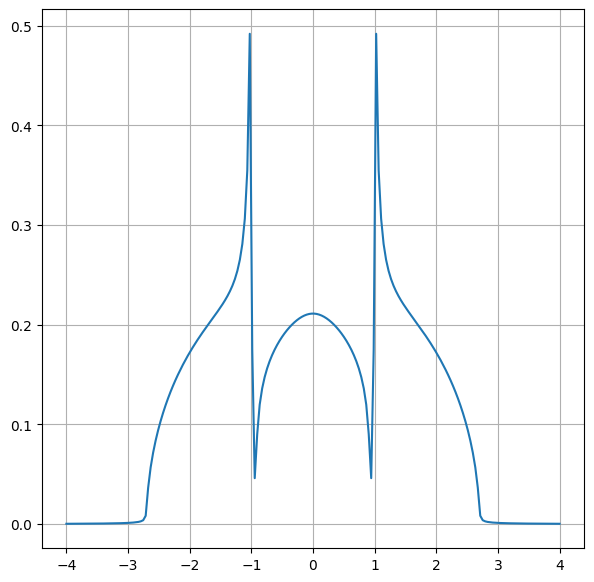

In [ ]:
#usage example
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)

'''
#checking convergence
z = 1 + .01j
n = 3
G0 = 1/z * np.eye(n)
G = hfsb_map(G0, z, A0, AA)
print(G)
max_iter = 1500
diffs = np.zeros((max_iter, 1))
for i in trange(max_iter):
  G1 = hfsb_map(G, z, A0, AA)
  diffs[i] = la.norm(G1 - G)
  G = G1
plt.plot(diffs)
plt.yscale("log")
plt.title("Convergence of the method")
print(G)
'''
f = get_density_B(1., A0, AA)
print(f)
a = 4
m = 100
XX = np.linspace(-a, a, 200)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_B(x, A0, AA)

print(sum(f)*2*a/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Numerical check.

It appears that the results of numeric simulations are in good agreement with my theoretical results.

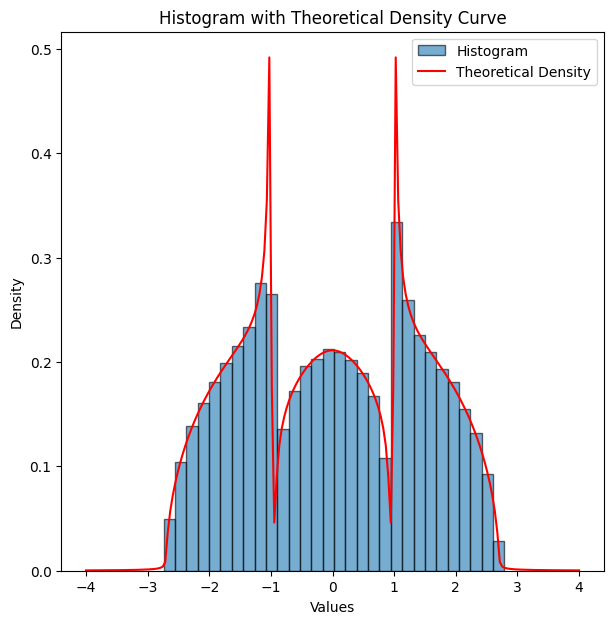

In [ ]:
size = 200
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((3 * size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_semicircle(size)
  C = random_semicircle(size)
  S = np.block([[zero_m, B, C], [B, zero_m, -ones_m], [C, -ones_m, zero_m]])
  #print(la.norm(S - np.conj(S.T)))
  e = la.eigvalsh(S)
  EE[:,count] = e

EE = EE.reshape(-1)

#plt.plot(EE)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 3b: The eigenvalue distribution  of the anticommutator of two semicircle r.v.s. via the equation for the biased matrix semicircle.

In order to find this distribution, note that we need to calculate $G(z, b(z))$, where
$$
b_\epsilon(z) = z(\Lambda_\epsilon(z) - a_0)^{-1},
$$
$\epsilon > 0$ is a small regularization paremater, and
$$
\Lambda_\epsilon(z) := \begin{bmatrix}
 z & 0 & \ldots & 0 \\
0 & i\epsilon & \ldots & 0 \\
\vdots & \vdots & \, & \vdots \\
0 & 0 & \ldots & i\epsilon
\end{bmatrix}.
$$
By definition,
$$
G(z, b) = m_0(b)z^{-1} + m_1(b) z^{-2} + m_2(b) z^{-3} + \ldots,
$$
and $m_k(b)$ are moments:
$$
m_k(b) := E[b(Xb)^k] = E[bXb \ldots Xb].
$$

Once $G(z, b(z))$ is calculated, we can calculate the Cauchy transform of the polynomial $p$ by using formula
$$
\phi[(z - p)^{-1}] = \lim_{\epsilon \to 0} \Big[ G(z, b_\epsilon(z)) \Big]_{1,1}.
$$


Finally, we can extract the density by the Stieljes inversion formula.

See the realization of the functions hsfc_map and get_density_C above.

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
[[ 0.85677217-0.0236651j   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.66645936-0.03109934j -0.16645932-0.00888516j]
 [ 0.        +0.j         -0.16645932-0.00888516j  0.66645936-0.03109934j]]


  0%|          | 0/200 [00:00<?, ?it/s]

[[0.32480451-0.79909655j 0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.03173303-0.53198881j 0.58519608-0.19815015j]
 [0.        +0.j         0.58519608-0.19815015j 0.03173303-0.53198881j]]


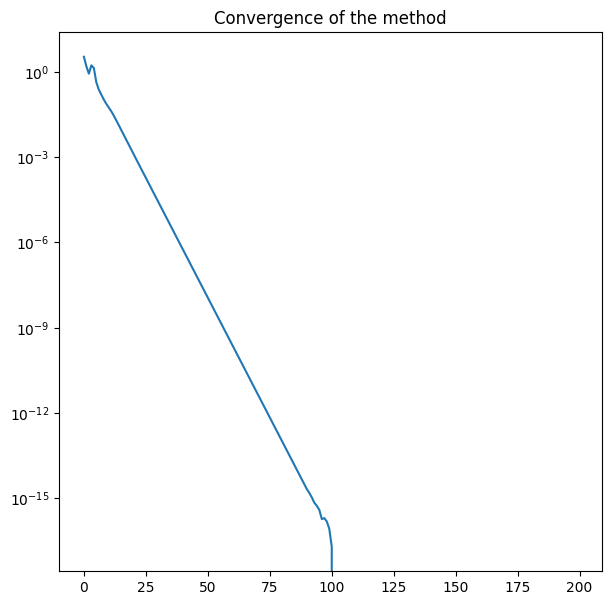

In [ ]:
#usage example
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)
z = .5 + .01j
n = 3
G0 = 1/z * np.eye(n)
G = hfsc_map(G0, z, A0, AA)
print(G)

max_iter = 200
diffs = np.zeros((max_iter, 1))
for i in trange(max_iter):
  G1 = hfsc_map(G, z, A0, AA)
  diffs[i] = la.norm(G1 - G)
  G = G1
plt.plot(diffs)
plt.yscale("log")
plt.title("Convergence of the method")
print(G)

0.19266827999370062
0.9931481735448777


0.2543603309338117

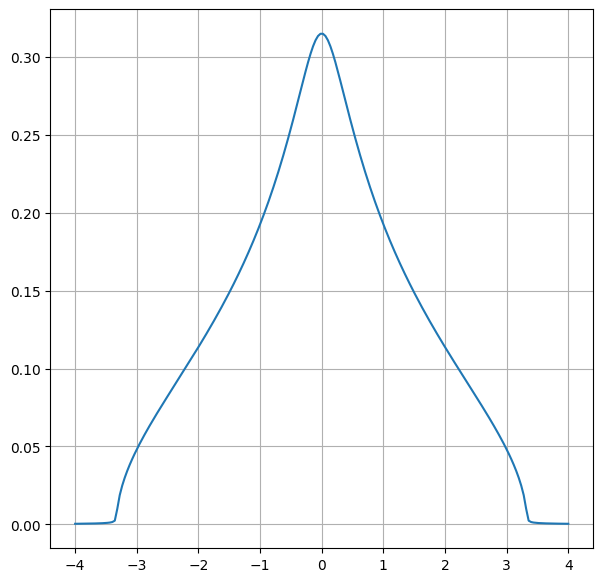

In [ ]:
f = get_density_C(1., A0, AA)
print(f)
a = 4
m = 200
XX = np.linspace(-a, a, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_C(x, A0, AA)

print(sum(f)*2*a/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

get_density_C(.5, A0, AA)

And here is the numerical check:

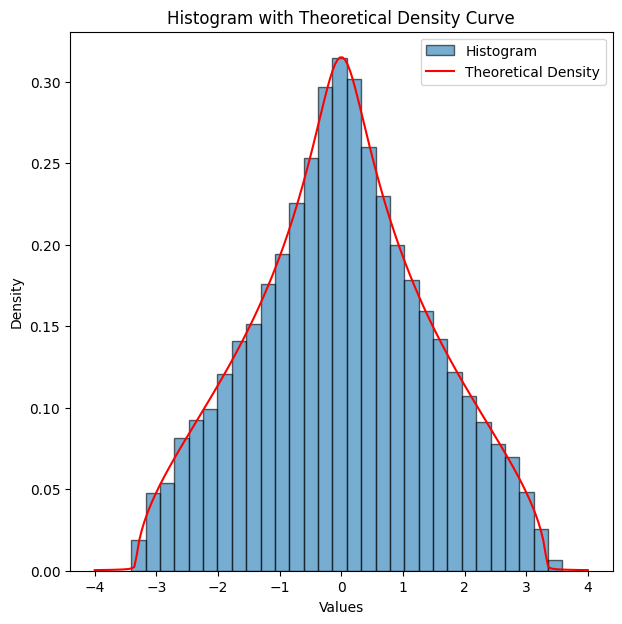

In [ ]:
size = 200
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_semicircle(size)
  e = la.eigvalsh(A @ B + B @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 4: Anticommutator using subordination.


Here we replicate the results of the previous example by using the method of subordination functions from Belinschi-Mai-Speicher paper.


The setup is the same.
$$
S =  \begin{bmatrix} 0 & X_1 & X_2 \\ X_1 & 0 & -1 \\ X_2 & -1 & 0 \end{bmatrix},
$$
where $X_1$ and $X_2$ are two standard semicircular variables. In this case we have
$$
a_0 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & -1 & 0 \end{bmatrix}, \,
a_1 = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}, \,
a_2 = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{bmatrix}.
$$
However, we aim to calculate the matrix Cauchy transform differently.

The subordination method is based on finding the fixed point of the map
$$
w \to h_y(h_x(w) + b) + b.
$$
where
$$h_x(w) = F_x(w) - w = \Big[G_x(w)\Big]^{-1} - w
$$
 and $h_y(w) = F_y(w) - w$.  ($x = a_1 \otimes X_1$ and $y = a_2 \otimes X_2$). This fixed point is the subordination function $\omega_1(b)$ and the Cauchy transform of $x + y$ is given by $G_{x + y}(b) = G_x(\omega_1(b))$. We want to a apply it to $b = \Lambda_\epsilon(z) - a_0$.

 The first thing to do is to calculate $G_x(w)$.



### The most basic approach to calculation of the Cauchy transform $G(w)$ of $b \otimes X$

In the basic approach we use the ingegral formula
$$
E\Big[ (w - b \otimes x)^{-1}\Big] = \lim_{\epsilon \to 0}\frac{-1}{\pi} \int_R (w - t b)^{-1} \Im (G_x(t + i\epsilon))\, dt.
$$

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
[[1 0 0]
 [0 0 0]
 [0 0 0]]
[[1.93723363-0.34870205j 0.        -0.j         0.        -0.j        ]
 [0.        -0.j         1.92307692-0.38461538j 0.        -0.j        ]
 [0.        +0.j         0.        +0.j         1.92307692-0.38461538j]]
test: [[ 0.61356512-0.11044172j -0.        +0.j         -0.        +0.j        ]
 [-0.        +0.j          0.60908138-0.12181628j -0.        +0.j        ]
 [ 0.        -0.j          0.        -0.j          0.60908138-0.12181628j]]
Resultant matrix G after integration:
[[2.36981728e-01-9.19149056e-01j 1.28539800e-04-4.72237529e-04j
  0.00000000e+00+0.00000000e+00j]
 [1.28539800e-04-4.72237529e-04j 2.36981728e-01-9.19149056e-01j
  0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  1.92274888e+00-3.84549776e-01j]]
Resultant matrix H after integration:
[[-2.36977787e-01+9.20148801e-01j -1.28543855e-04-5.2776948

  0%|          | 0/10 [00:00<?, ?it/s]

[-0.7781087 -0.17707358j -0.71579337-0.58310462j -0.52190774-0.78319082j
 -0.31551017-0.89382856j -0.10547324-0.94460596j  0.10547324-0.94460596j
  0.31551017-0.89382856j  0.52190774-0.78319082j  0.71579337-0.58310462j
  0.7781087 -0.17707358j]


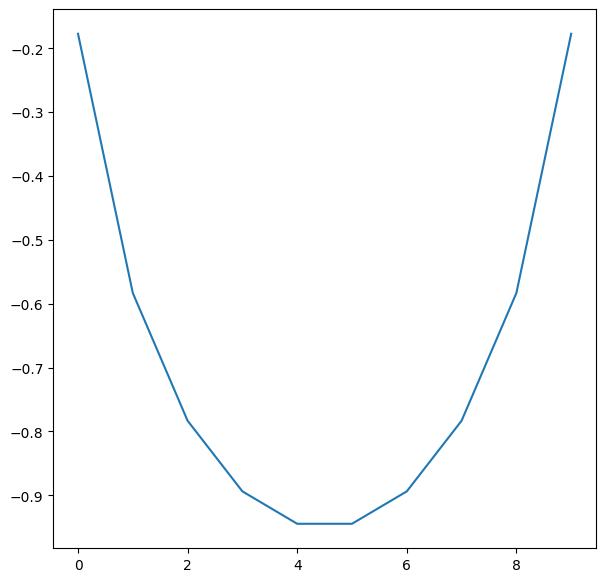

In [ ]:
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
A_test = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
print(A0)
print(A1)
print(A2)
print(A_test)
AA = (A1, A2)
n = A0.shape[0]
w = (0.5 + 0.1j) * np.eye(n)
z = 0.01j
print(la.inv(w - z * A_test))

# Define the matrix-valued function
def matrix_function(z, w, b):
    """Matrix-valued function of a complex variable z."""
    return -(1/np.pi) * la.inv(w - z * b) * np.imag(G_semicircle(z))

print("test:", matrix_function(z, w, A_test))

# Define the real path and shift it slightly above the real line
epsilon = 1e-3  # Small imaginary shift
def shifted_path(x):
    return x + 1j * epsilon

# Integration limits
al, au = -4, 4  # Example real integration limits

# Perform the integration for each matrix entry
def cauchy_matrix_semicircle_0(w, b):
    w = np.asarray(w, dtype=np.complex128)  # Ensure input is treated as complex
    matrix_size = matrix_function(0, w, b).shape  # Get the shape of the matrix
    result = np.zeros(matrix_size, dtype=complex)  # Initialize result matrix
    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            # Define the scalar function for the (i, j)-th entry
            def scalar_function(x, w, b):
                z = shifted_path(x)
                return matrix_function(z, w, b)[i, j]

            scalar_func_with_params = partial(scalar_function, w = w, b = b)
            # Perform the numerical integration
            integral_real, _ = quad(lambda x: scalar_func_with_params(x).real, al, au)
            integral_imag, _ = quad(lambda x: scalar_func_with_params(x).imag, al, au)
            result[i, j] = integral_real + 1j * integral_imag  # Save the result
    return result

def H_matrix_semicircle_0(w, A1, eps = 1E-8):
  ''' This is the h function: h = G(w)^{-1} - w$ '''
  return(la.inv(cauchy_matrix_semicircle_0(w, A1)) - w)


# Compute the cauchy transform via integral
result_matrix = cauchy_matrix_semicircle_0(w, A1)
print("Resultant matrix G after integration:")
print(result_matrix)

# Compute the h-function
result_matrix = H_matrix_semicircle_0(w, A1)
print("Resultant matrix H after integration:")
print(result_matrix)



#Let us visualize the result:

m = 10
x = np.linspace(-2, 2, m)
GG = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = cauchy_matrix_semicircle_0((x[i]+ 0.1j) * np.eye(n), A1)
  GG[i] = result[0, 0]
plt.plot(np.imag(GG))
print(GG)


Now we want to run the map
$$
w \to h_y(h_x(w) + b) + b.
$$
to convergence. Again, we are interested in $b = \Lambda_\epsilon(z) - a_0$. This is supposed to give a subordination function $\omega_1(b)$.

Here we do have convergence alghough it is not particularly fast.

Run the subordination functional mapping
$$
w \to h_y(h_x(w) + b) + b.
$$
 iteratively until convergence. Around 30 iterations is needed.

[[0.5+1.e-02j 0. +0.e+00j 0. +0.e+00j]
 [0. +0.e+00j 0. +1.e-06j 1. +0.e+00j]
 [0. +0.e+00j 1. +0.e+00j 0. +1.e-06j]]
[[0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j]]
[[ 5.71145789e-01+4.22977713e-01j -1.89704269e-12-1.23493962e-07j
  -3.62807108e-04-8.19543777e-04j]
 [-1.89705429e-12-1.23493962e-07j  1.66533454e-15+1.06568580e-04j
   1.00017061e+00+8.40522096e-13j]
 [-3.62807108e-04-8.19543777e-04j  1.00017061e+00+8.40517392e-13j
  -4.05118215e-01+7.39158545e-01j]]


  0%|          | 0/30 [00:00<?, ?it/s]

[[ 4.68456470e-01+5.42548442e-01j -5.09250277e-08-9.65414643e-08j
  -2.98465596e-04-5.65846801e-04j]
 [-5.09250277e-08-9.65414643e-08j -5.53971993e-05+1.37384208e-04j
   1.00017064e+00+1.42422185e-12j]
 [-2.98465596e-04-5.65846801e-04j  1.00017064e+00+1.42422688e-12j
  -3.24699153e-01+7.99387652e-01j]]


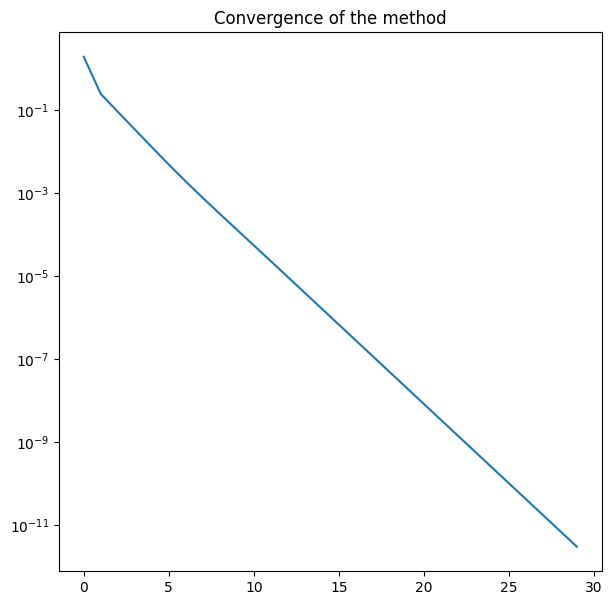

In [ ]:
z = .5 + .01j
n = 3
B = Lambda(z, n) - A0
print(B)

W0 = 1.j * np.eye(n) #(initialization)
print(W0)

W1 = H_matrix_semicircle_0(W0, A1) + B
W2 = H_matrix_semicircle_0(W1, A2) + B
print(W2)

max_iter = 30
diffs = np.zeros((max_iter, 1))
for i in trange(max_iter):
  W1 = H_matrix_semicircle_0(W0, A1) + B
  #print("W1 = ", W1)
  W2 = H_matrix_semicircle_0(W1, A2) + B
  #print("W2 = ", W2)
  diffs[i] = la.norm(W2 - W0)
  W0 = W2
plt.plot(diffs)
plt.yscale("log")
plt.title("Convergence of the method")
print(W0)

Then we can compute $G_{x + y}(b)$ as $G_x(\omega_1(b))$. Then we take $G_{11}$ and apply Stieltjes inversion formula. Theh number is more or less in agreement with what we seen in the method that avoided using subordination.

In [ ]:
-cauchy_matrix_semicircle_0(W0, A1)[0,0].imag/np.pi

0.2541082057095675

### Here is the Cauchy transform of $a \otimes X$ using regularization.
It works OK. May be preferable since does not require specifying or estimating the rank of a.

We look for $E(w - a_1 \otimes x_1)^{-1}$. We will regularize $a_1$ so that it is invertible.
Then
$$
 a_1^{-1} w = V \begin{bmatrix}
 \mu_1 & &  \\  &\ddots & \\ & & \mu_r
 \end{bmatrix} V^{-1},
$$
 and then
\begin{equation}
%\label{equ_matrix_G2}
 E \big[(w - a_1\otimes x_1)^{-1}\big] =  E \big[(a_1^{-1} w - I \otimes x_1)^{-1}\big] a_1^{-1} = V \begin{bmatrix}G_x(\mu_1) & &  \\  &\ddots & \\ & & G_x(\mu_r)\end{bmatrix} V^{-1} a_1^{-1}.
 \end{equation}


In [ ]:
def cauchy_matrix_semicircle_1(w, A1, eps = 1E-8):
  ''' This is function that computes the Cauchy transform of $A1 \otimes X$, where
  X is the standard semicirlce and A1 is an $n\times n$ matrix. The argument is w,
  so we calculate E(w - A1 \otimes X)^{-1}. The parameter eps is for regularization to handle
  the case when A1 is not inverible.'''
  n = A1.shape[0]
  mu, V = la.eig(la.inv(A1 + 1.j * eps * np.eye(n)) @ w)
  return V @ np.diag(G_semicircle(mu)) @ la.inv(V) @ la.inv(A1 + 1.j * eps * np.eye(n))

def H_matrix_semicircle_1(w, A1, eps = 1E-8):
  ''' This is the h function: h = G(w)^{-1} - w$ '''
  return(la.inv(Cauchy_matrix_semicircle_1(w, A1, eps)) - w)


n = 2
A1 = np.eye(n)
A1 = np.array([[0, 1], [1, 0]])

z = (0.0 + 0.01j)
w = z * np.eye(n)

#np.set_printoptions(precision=2)
arr = Cauchy_matrix_semicircle_1(w, A1)
print(arr)
H_matrix_semicircle_1(w, A1)



[[-7.81130850e-17-9.95012500e-01j -9.90037492e-09-3.89759104e-16j]
 [-9.90037507e-09+2.33941280e-16j  7.81130835e-17-9.95012500e-01j]]


array([[-7.88981297e-17+9.95012500e-01j, -9.99987492e-09-3.93676231e-16j],
       [-9.99987508e-09+2.36292419e-16j,  7.88981313e-17+9.95012500e-01j]])

Let us do some checking.

[[ 0.-6.17754157e-01j  0.+0.00000000e+00j  0.-2.76217740e-04j]
 [ 0.+0.00000000e+00j -0.-9.99829418e-01j  0.+0.00000000e+00j]
 [ 0.-2.76217740e-04j  0.+0.00000000e+00j  0.-6.17754157e-01j]]
old appoach = 
 [[ 0.-6.17754157e-01j  0.+0.00000000e+00j  0.-2.76217740e-04j]
 [ 0.+0.00000000e+00j -0.-9.99829418e-01j  0.+0.00000000e+00j]
 [ 0.-2.76217740e-04j  0.+0.00000000e+00j  0.-6.17754157e-01j]]
-0.6180339887498949j


  0%|          | 0/10 [00:00<?, ?it/s]

[-0.7781087 -0.17707358j -0.71579337-0.58310462j -0.52190774-0.78319082j
 -0.31551017-0.89382856j -0.10547324-0.94460596j  0.10547324-0.94460596j
  0.31551017-0.89382856j  0.52190774-0.78319082j  0.71579337-0.58310462j
  0.7781087 -0.17707358j]


  0%|          | 0/10 [00:00<?, ?it/s]

[-0.7791706 -0.17641913j -0.71639102-0.58350617j -0.52223479-0.78364759j
 -0.31568355-0.8942989j  -0.10552809-0.94508065j  0.10552809-0.94508065j
  0.31568355-0.8942989j   0.52223479-0.78364759j  0.71639102-0.58350617j
  0.7791706 -0.17641913j]


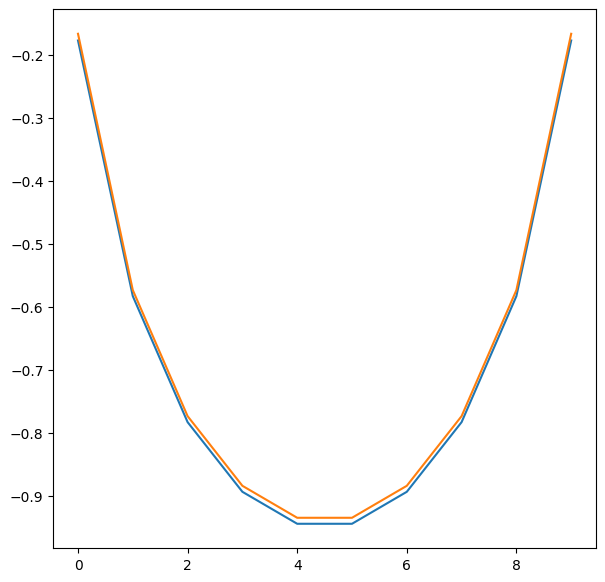

In [ ]:
n = 2
rank = 2
A1 = np.eye(n)
A1 = np.array([[0, 1], [1, 0]])

#A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
n = 3
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A1 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])





z = (0.0 + 1j)
w = z * np.eye(n)

G = cauchy_matrix_semicircle_0(w, A1)
print(G)
print('old appoach = \n', cauchy_matrix_semicircle_0(w, A1))
print(G_semicircle(z))

#H = H_matrix_semicircle_0(w, A1, rank)
#print(H)

#Let us visualize the result:
m = 10
x = np.linspace(-2, 2, m)
GG = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = cauchy_matrix_semicircle_0((x[i]+ 0.1j) * np.eye(n), A1)
  GG[i] = result[0, 0]
plt.plot(np.imag(GG))
print(GG)

m = 10
x = np.linspace(-2, 2, m)
GG_new = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = cauchy_matrix_semicircle_1((x[i]+ 0.1j) * np.eye(n), A1)
  GG_new[i] = result[0, 0]
plt.plot(np.imag(GG_new) + 0.01)
print(GG_new)

### More sophisticated approach to the calculation of Cauchy transform $G(w)$ of $b \otimes X$

 This was explained above, in the beginning of the notebook, where we listed the most basic functions.


The code below seems to indicate that $G(w)$ is the same as calculated by the brute-force method.

  0%|          | 0/10 [00:00<?, ?it/s]

[-0.7781087 -0.17707358j -0.71579337-0.58310462j -0.52190774-0.78319082j
 -0.31551017-0.89382856j -0.10547324-0.94460596j  0.10547324-0.94460596j
  0.31551017-0.89382856j  0.52190774-0.78319082j  0.71579337-0.58310462j
  0.7781087 -0.17707358j]


  0%|          | 0/10 [00:00<?, ?it/s]

[-0.7791706 -0.17641913j -0.71639102-0.58350617j -0.52223479-0.78364759j
 -0.31568355-0.8942989j  -0.10552809-0.94508065j  0.10552809-0.94508065j
  0.31568355-0.8942989j   0.52223479-0.78364759j  0.71639102-0.58350617j
  0.7791706 -0.17641913j]


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.77811198+0.17806727j  0.71578788+0.5840976j   0.52190101+0.78418688j
  0.31550515+0.89482752j  0.10547141+0.94560654j -0.10547141+0.94560654j
 -0.31550515+0.89482752j -0.52190101+0.78418688j -0.71578788+0.5840976j
 -0.77811198+0.17806727j]


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.7791706 +0.17641913j  0.71639102+0.58350617j  0.52223479+0.78364759j
  0.31568355+0.8942989j   0.10552809+0.94508065j -0.10552809+0.94508065j
 -0.31568355+0.8942989j  -0.52223479+0.78364759j -0.71639102+0.58350617j
 -0.7791706 +0.17641913j]


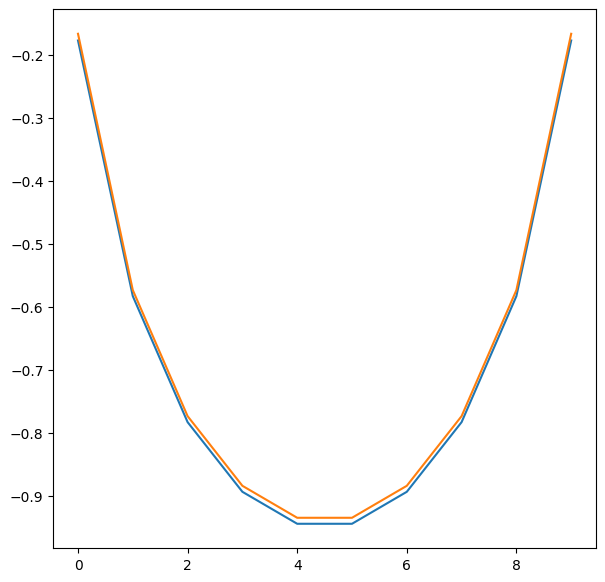

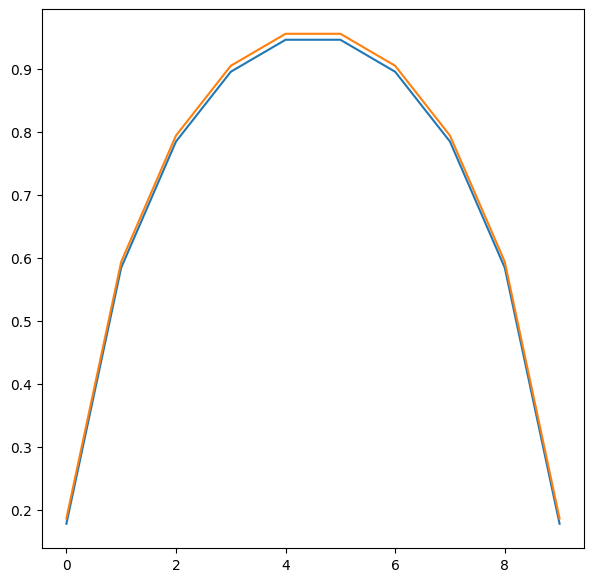

In [ ]:

A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A1 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])



#Let us visualize the result:
m = 10
x = np.linspace(-2, 2, m)
GG = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = cauchy_matrix_semicircle_0((x[i]+ 0.1j) * np.eye(n), A1)
  GG[i] = result[0, 0]
plt.plot(np.imag(GG))
print(GG)

m = 10
x = np.linspace(-2, 2, m)
GG_new = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = G_matrix_semicircle((x[i]+ 0.1j) * np.eye(n), A1, rank = 2)
  GG_new[i] = result[0, 0]
plt.plot(np.imag(GG_new) + 0.01)
print(GG_new)

plt.figure()

m = 10
x = np.linspace(-2, 2, m)
HH = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = H_matrix_semicircle_0((x[i]+ 0.1j) * np.eye(n), A1)
  HH[i] = result[0, 0]
plt.plot(np.imag(HH))
print(HH)

m = 10
x = np.linspace(-2, 2, m)
HH_new = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = H_matrix_semicircle((x[i]+ 0.1j) * np.eye(n), A1, rank = 2)
  HH_new[i] = result[0, 0]
plt.plot(np.imag(HH_new) + 0.01)
print(HH_new)



### Matrix Subordination Function

Let us get the subordination function. Recall that $\omega_1(b)$ is the fixed point of the map
$$
w \to h_y(h_x(w) + b) + b.
$$
where $h_x(w) = F_x(w) - w$ and $h_y(w) = F_y(w) - w$, and $F_x, F_y$ are inverses of the corresponding Cauchy transforms.

Given that $\omega_1(b)$ is calculated, we can find the Cauchy transform for the sum $x + y$ as
$$
G_{x + y}(b) = G_x(\omega_1(b)).
$$

We realize $\omega_1(b)$ as a function $\omega\big(b, (x, y)\big)$.


First, let us check convergence of the method here.

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
[[0.5+1.e-02j 0. +0.e+00j 0. +0.e+00j]
 [0. +0.e+00j 0. +1.e-06j 1. +0.e+00j]
 [0. +0.e+00j 1. +0.e+00j 0. +1.e-06j]]


  0%|          | 0/40 [00:00<?, ?it/s]

[[ 4.68266973e-01+5.41988810e-01j  0.00000000e+00-4.93038066e-32j
  -2.63542378e-16-6.63102185e-16j]
 [ 0.00000000e+00+9.86076132e-32j  0.00000000e+00+1.00000000e-06j
   1.00000000e+00-2.77555756e-17j]
 [-5.22011629e-17+4.84157029e-16j  1.00000000e+00+1.38777878e-17j
  -3.24804505e-01+7.99097547e-01j]]


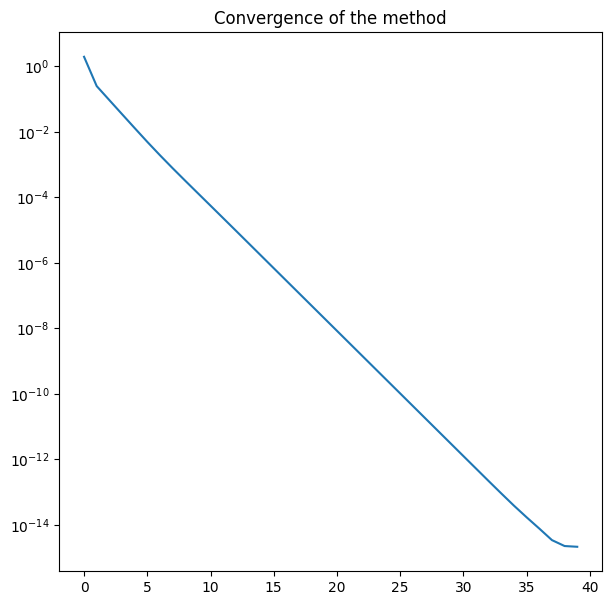

In [ ]:
def Lambda(z, size, eps = 1E-6):
  A = eps * 1.j * np.eye(size)
  A[0, 0] = z
  return A

A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)
n = A0.shape[0]

z = .5 + .01j
B = Lambda(z, n) - A0
print(B)


W0 = 1.j * np.eye(n) #(initialization)
  #print(W0)
A1 = AA[0]
A2 = AA[1]
  #W1 = H_matrix_semicircle(W0, A1, rank = 2) + B
  #W2 = H_matrix_semicircle(W1, A2, rank = 2) + B
  #print(W2)
max_iter = 40
diffs = np.zeros((max_iter, 1))
for i in trange(max_iter):
  W1 = H_matrix_semicircle(W0, A1, rank = 2) + B
  #print("W1 = ", W1)
  W2 = H_matrix_semicircle(W1, A2, rank = 2) + B
  #print("W2 = ", W2)
  diffs[i] = la.norm(W2 - W0)
  W0 = W2
plt.plot(diffs)
plt.yscale("log")
plt.title("Convergence of the method")
print(W0)

Now we define the subordination function $\omega_1(b) = \omega\big(b, (a_1, a_2)\big)$.

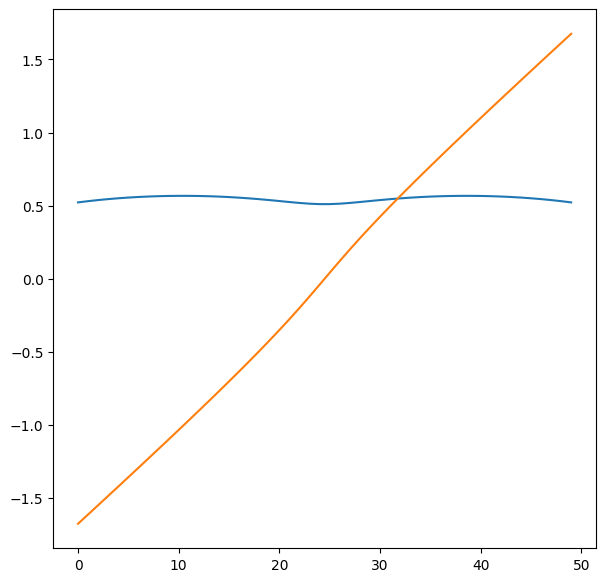

In [ ]:
#See the definition of the function in the beginning of the notebook

#let us do some visualization
m = 50
tt = np.linspace(-2, 2, m)
om = np.zeros((m, 1), dtype = np.complex128)
for i in range(m):
  om[i] = omega(Lambda(tt[i] + 0.01j, n) - A0, (AA), rank = (2,2))[0,0]
#print(om)
plt.plot(np.imag(om))
plt.plot(np.real(om))

### Calculating the density of the anticommutator.

Now our goal is to write the function that would compute density of the anticommutator at a given point.

0.2543603309335966
0.9772380829680988


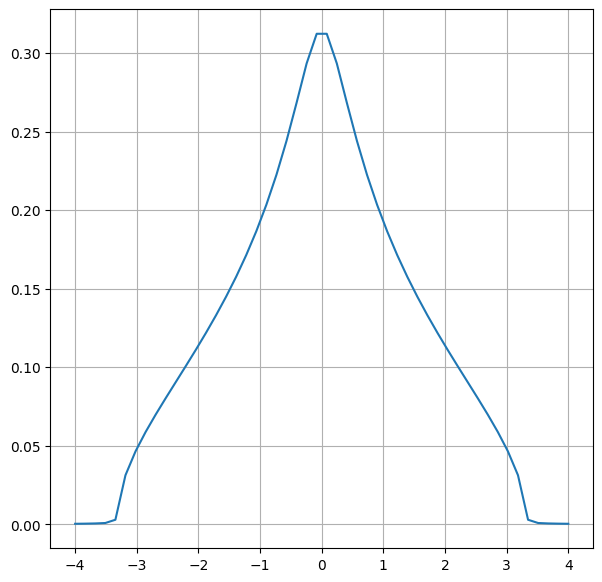

In [ ]:
def get_density_anticommutator(x, eps = 0.01):
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  Gxy = G_matrix_semicircle(omega(B, AA, rank = (2, 2)), A1, rank = 2)
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = .5
f = get_density_anticommutator(x)
print(f)

#visualization
m = 50
a = 4
XX = np.linspace(-a, a, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator(x)

print(sum(f)*2*a/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

And the numerical check.

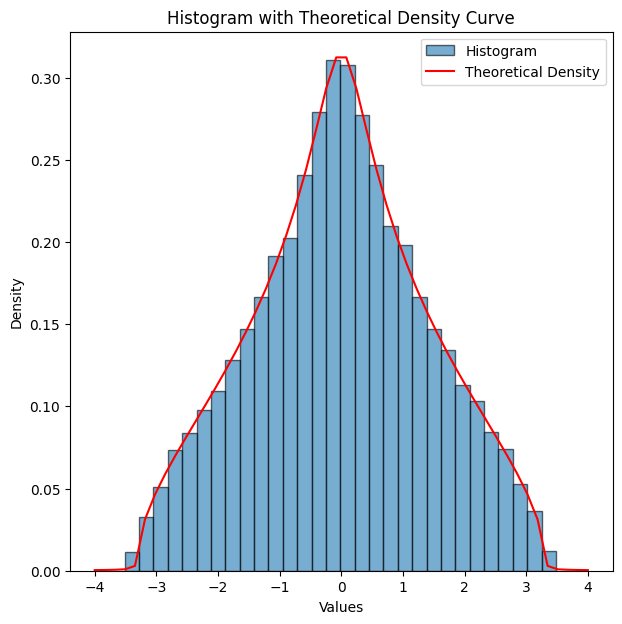

In [ ]:
size = 200
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_semicircle(size)
  e = la.eigvalsh(A @ B + B @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 4b. Anticommutator of Poisson r.v.s.

In this example, $X$ and $Y$ are free Poisson with parameters $\lambda_1$ and $\lambda_2$. We want to calculate their anticommutator. Here we are forced to use the subordination method.

We havd defined the matrix version of the Cauchy transform for the free Poisson random variable $b \otimes x$ (see above). Here we do some visualization.

G_matrix_fpoisson =  [[ 3.01911219e-17-1.12693728e-01j  0.00000000e+00+0.00000000e+00j
  -2.75100677e-01-7.23219971e-18j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-1.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [-2.75100677e-01-3.98516388e-17j  0.00000000e+00+0.00000000e+00j
   1.88911732e-17-1.12693728e-01j]]


  0%|          | 0/100 [00:00<?, ?it/s]

[ 0.75556947+0.14200913j  0.73688008+0.1435813j   0.71820513+0.14493328j
  0.69954815+0.14607067j  0.68091254+0.14699835j  0.66230162+0.14772052j
  0.64371869+0.14824079j  0.62516705+0.14856222j  0.60665004+0.14868736j
  0.58817107+0.14861831j  0.56973366+0.14835673j  0.55134145+0.14790387j
  0.53299824+0.14726061j  0.51470806+0.14642745j  0.49647514+0.14540455j
  0.47830399+0.14419173j  0.46019944+0.14278848j  0.44216664+0.141194j
  0.42421118+0.13940714j  0.40633908+0.13742649j  0.38855689+0.1352503j
  0.37087175+0.13287656j  0.35329145+0.13030298j  0.33582456+0.12752699j
  0.31848049+0.12454574j  0.30126966+0.12135617j  0.28420359+0.11795498j
  0.26729512+0.11433869j  0.25055855+0.11050367j  0.2340099 +0.10644622j
  0.21766718+0.10216265j  0.20155069+0.09764939j  0.18568342+0.09290318j
  0.17009146+0.08792126j  0.15480461+0.08270175j  0.13985696+0.07724404j
  0.1252877 +0.0715494j   0.11114203+0.0656219j   0.09747227+0.05946957j
  0.08433915+0.05310611j  0.07181335+0.04655342j  0.05

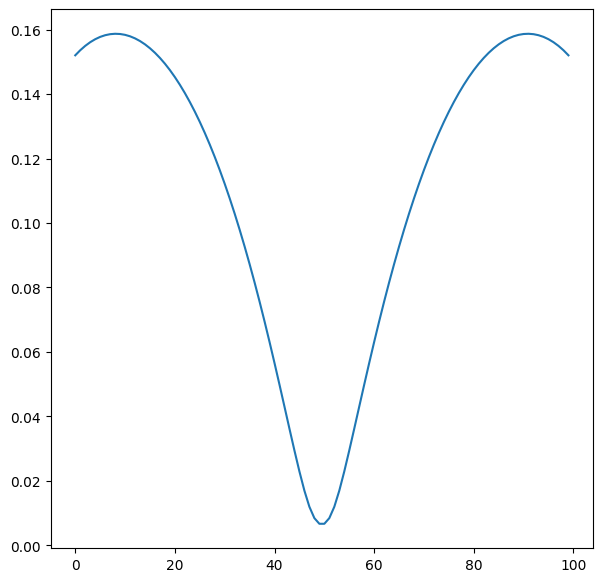

In [ ]:
n = 3
lambda_param = 4
A1 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
rank = 2
z = (0.0 + 1j)
w = z * np.eye(n)

G = G_matrix_fpoisson(w, A1, rank, lambda_param)
print("G_matrix_fpoisson = ", G)


A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
#A1 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
m = 100
x = np.linspace(-2, 2, m)
GG_new = np.zeros(m, dtype=np.complex128)
for i in trange(m):
  result = H_matrix_fpoisson((x[i]+ 0.1j) * np.eye(n), A1, rank = 2, lambda_param = 0.5)
  GG_new[i] = result[0, 0]
plt.plot(np.imag(GG_new) + 0.01)
print(GG_new)

Now we want to use the the general purpose subordination function omega_sub.

In [ ]:
#an example
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)
n = A0.shape[0]

z = .5 + .01j
B = Lambda(z, n) - A0
print(B)

result = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_fpoisson",
                   H2_name = "H_matrix_fpoisson",
                   H1_kwargs={"lambda_param":4},
                   H2_kwargs={"lambda_param":4})

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
[[0.5+1.e-02j 0. +0.e+00j 0. +0.e+00j]
 [0. +0.e+00j 0. +1.e-06j 1. +0.e+00j]
 [0. +0.e+00j 1. +0.e+00j 0. +1.e-06j]]


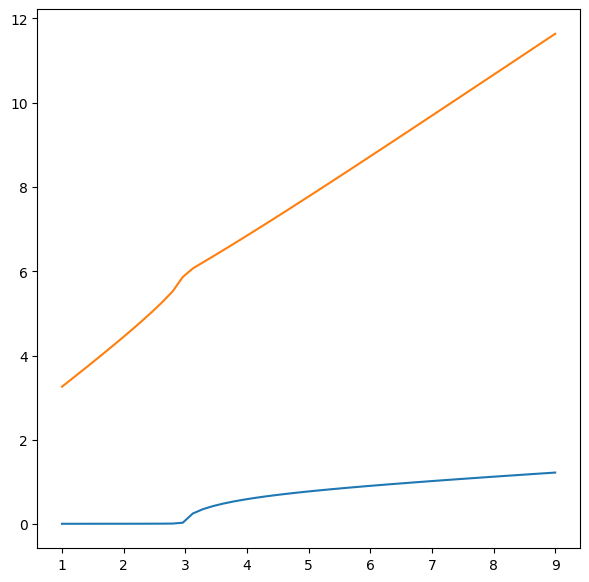

In [ ]:
#let us do some visualization
m = 50
tt = np.linspace(1, 9, m)
om = np.zeros((m, 1), dtype = np.complex128)
for i in range(m):
  B = Lambda(tt[i] + 0.01j, n) - A0
  om[i] = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_fpoisson",
                   H2_name = "H_matrix_fpoisson",
                   H1_kwargs={"lambda_param":4},
                   H2_kwargs={"lambda_param":4})[0,0]
#print(om)
plt.plot(tt, np.imag(om))
plt.plot(tt, np.real(om))

Now let us try to calculate the density of the anticommutator.

0.02149185891478401
0.9825974977479452
expectation =  31.347519545798708


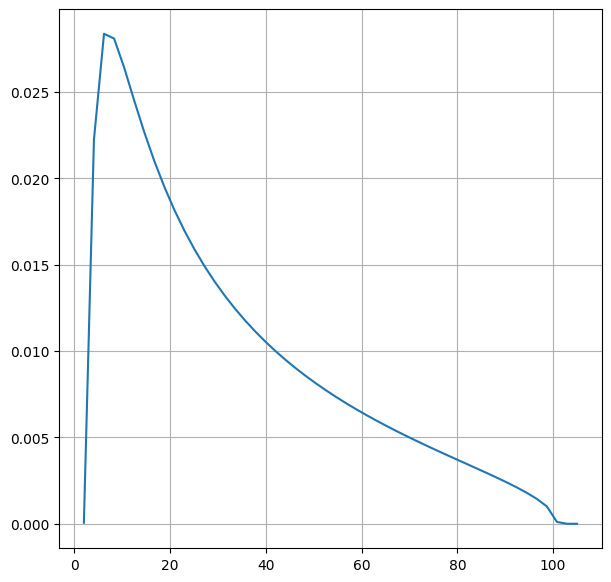

In [ ]:
def get_density_anticommutator_fpoisson(x, lambda_param, eps = 0.01):
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  om = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_fpoisson",
                   H2_name = "H_matrix_fpoisson",
                   H1_kwargs={"lambda_param":lambda_param},
                   H2_kwargs={"lambda_param":lambda_param})
  Gxy = G_matrix_fpoisson(om, A1, rank = 2, lambda_param = lambda_param)
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = 4
f = get_density_anticommutator_fpoisson(x, lambda_param = 4)
print(f)

#visualization

m = 50
al = 2
au = 105
lambda_param = 4
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator_fpoisson(x,lambda_param)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)


expect = sum(XX * f)*(au - al)/m
print("expectation = ", expect)

#g = - G_free_poisson(XX + .01j, 100).imag/(np.pi)
#plt.plot(XX, g)


Numerical check:

Finding the distribution of the anti-commutator of the free Poisson r.v.s by using large random matrices.

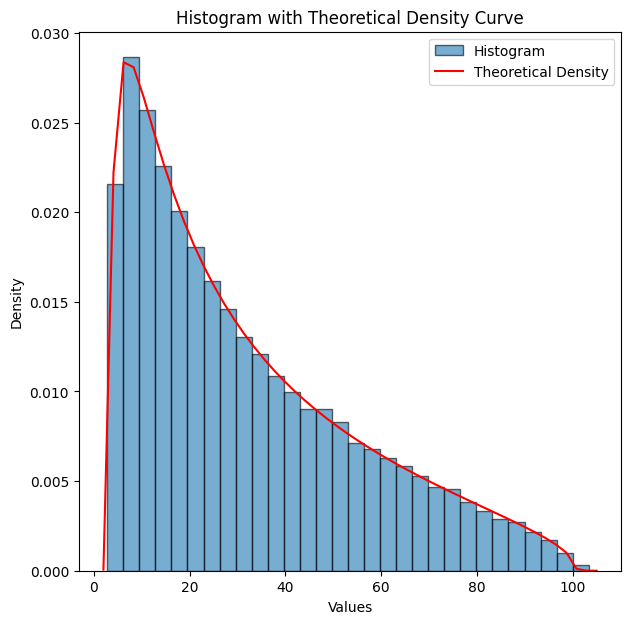

In [ ]:
size = 200
lam = 4
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_fpoisson(size, lam)
  B = random_fpoisson(size, lam)
  e = la.eigvalsh(A @ B + B @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 4c: Anticommutator of a semicircle and a free Poisson r.v.s

Let us use the subordination function for this pair.

In [ ]:
#an example
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)
n = A0.shape[0]

z = .5 + .01j
B = Lambda(z, n) - A0
print(B)

result = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_semicircle",
                   H2_name = "H_matrix_fpoisson",
                   H1_kwargs={},
                   H2_kwargs={"lambda_param":4})

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0 1 0]
 [1 0 0]
 [0 0 0]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
[[0.5+1.e-02j 0. +0.e+00j 0. +0.e+00j]
 [0. +0.e+00j 0. +1.e-06j 1. +0.e+00j]
 [0. +0.e+00j 1. +0.e+00j 0. +1.e-06j]]


0.02149185891478401
0.9786195416264093


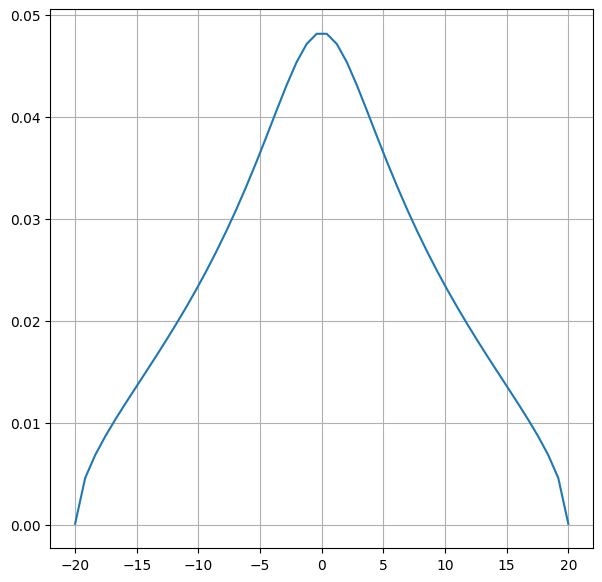

In [ ]:
def get_density_anticommutator_S_FP(x, lambda_param, eps = 0.01):
  '''calculates the density of the anticommutator of a semicircle and
  a free poisson r.v. with parameter lambda_param'''
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  om = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_semicircle",
                   H2_name = "H_matrix_fpoisson",
                   H1_kwargs={},
                   H2_kwargs={"lambda_param":lambda_param})
  Gxy = G_matrix_semicircle(om, A1, rank = 2)
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = 4
f = get_density_anticommutator_fpoisson(x, lambda_param = 4)
print(f)

#visualization

m = 50
al = -20
au = 20
lambda_param = 4
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator_S_FP(x,lambda_param)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Numerical check

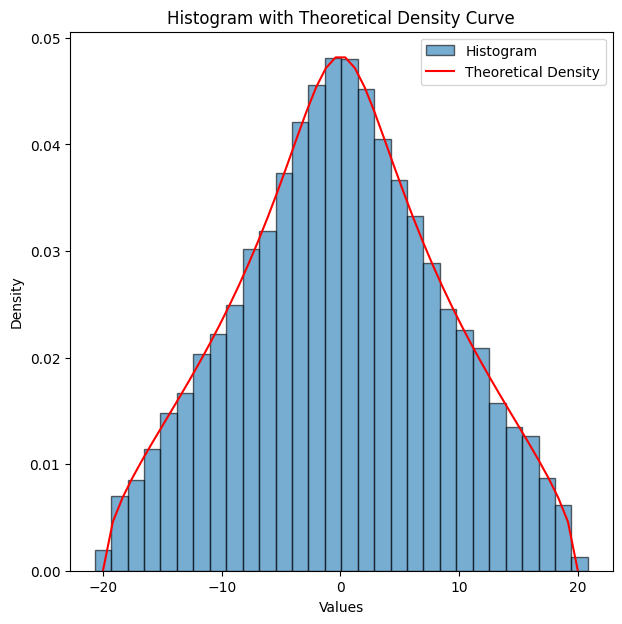

In [ ]:
size = 200
lam = 4
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_fpoisson(size, lam)
  e = la.eigvalsh(A @ B + B @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 5: Deformed anticommutator

Here we consider the deformed anticommutator
$$
p(X, Y) = X Y + Y X + X^2
$$
(This is an example 5.2 from Belinschi-Mai-Speicher 2013).

This polynomial has a nice linearization:
$$
L = \begin{bmatrix}
0 & X & \frac{1}{2}X + Y \\
X & 0 & -1 \\
\frac{1}{2}X + Y & - 1 & 0
\end{bmatrix}
=  \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & -1 \\
0 & - 1 & 0
\end{bmatrix} +
\begin{bmatrix}
0 & 1 & \frac{1}{2} \\
1 & 0 & 0 \\
\frac{1}{2} & 0 & 0
\end{bmatrix} X +
\begin{bmatrix}
0 & 0 &  1 \\
0 & 0 & 0 \\
1 & 0 & 0
\end{bmatrix} Y.
$$

### 5a. First we consider the situation when $X$ and $Y$ are free semicircles.

[[ 0  0  0]
 [ 0  0 -1]
 [ 0 -1  0]]
[[0.  1.  0.5]
 [1.  0.  0. ]
 [0.5 0.  0. ]]
[[0 0 1]
 [0 0 0]
 [1 0 0]]
0.17931510413026275
0.993609197427841


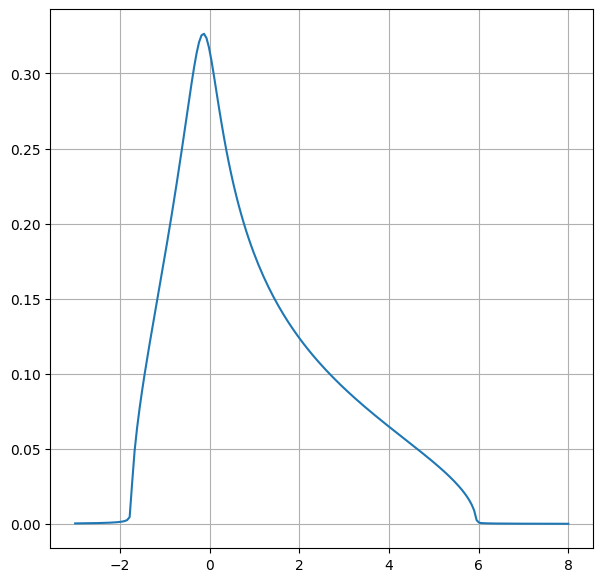

In [ ]:
#usage example
A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
A1 = np.array([[0, 1, 1/2], [1, 0, 0], [1/2, 0, 0]])
A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
print(A0)
print(A1)
print(A2)
AA = (A1, A2)
f = get_density_C(1., A0, AA)
print(f)
al = -3
au = 8
m = 200
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_C(x, A0, AA)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Nymerical check:

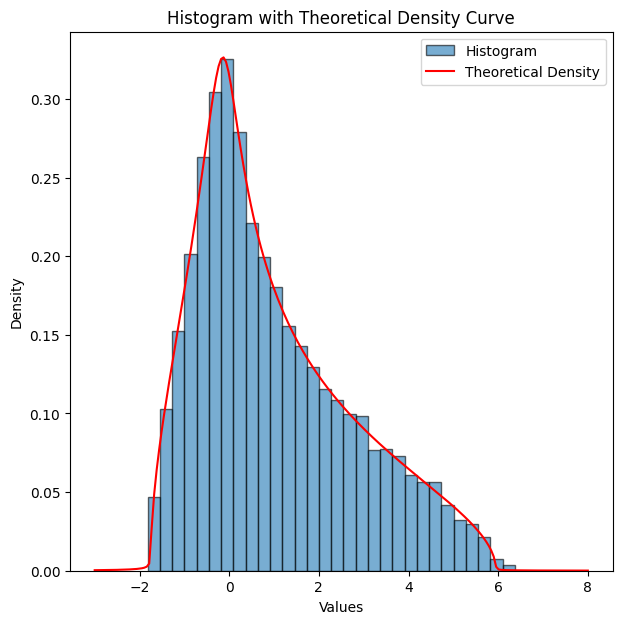

In [ ]:
size = 200
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_semicircle(size)
  e = la.eigvalsh(A @ B + B @ A + A @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

Now we repeat the calculation using the subordination method.

0.2304252505328422
0.9766857786101701


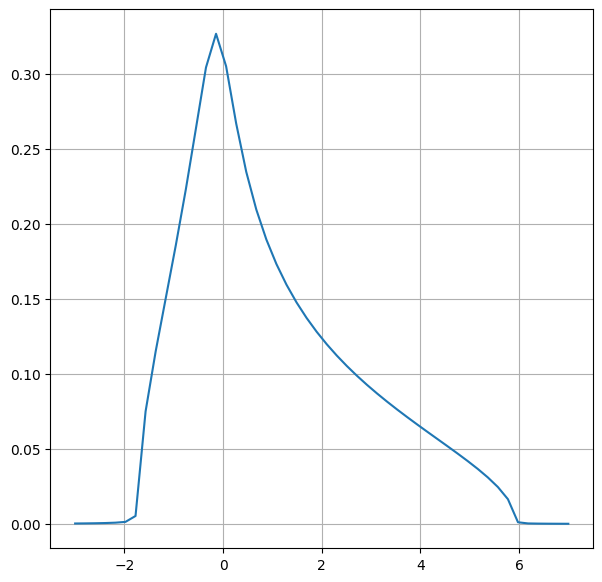

In [ ]:
def get_density_anticommutator_deform(x, eps = 0.01):
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 1/2], [1, 0, 0], [1/2, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  Gxy = G_matrix_semicircle(omega(B, AA, rank = (2, 2)), A1, rank = 2)
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = .5
f = get_density_anticommutator_deform(x)
print(f)

#visualization
m = 50
al = -3
au = 7
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator_deform(x)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Numerical check:

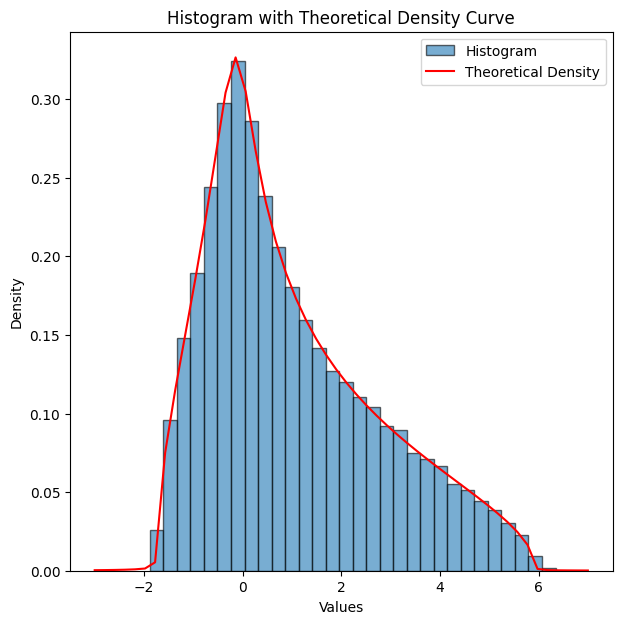

In [ ]:
size = 200
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_semicircle(size)
  e = la.eigvalsh(A @ B + B @ A + A @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 5b: Deformed anticommutator of the semicircle and the free Poisson.

Here we will use $X$ -- semicircle and $Y$ -- free Poisson.  

0.04718992785714808
0.9896182546665183


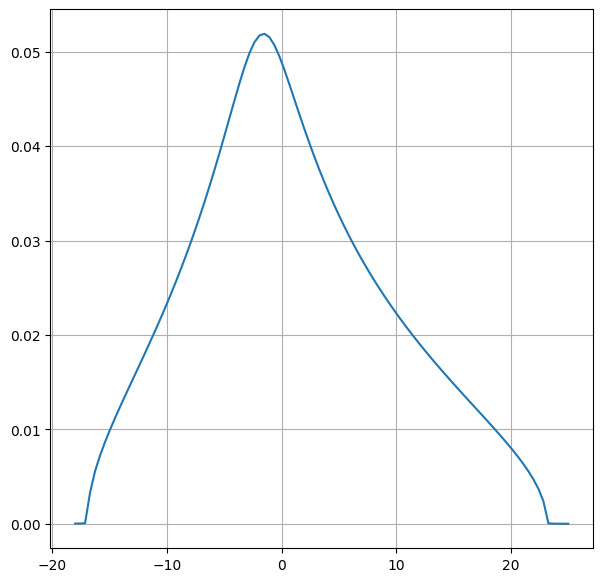

In [ ]:
def get_density_anticommutator_deform_SFP(x, lambda_param, eps = 0.01):
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 1/2], [1, 0, 0], [1/2, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  om = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_semicircle",
                   H2_name = "H_matrix_fpoisson",
                   H1_kwargs={},
                   H2_kwargs={"lambda_param":lambda_param})
  Gxy = G_matrix_semicircle(om, A1, rank = 2)
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = .5
lam = 4
f = get_density_anticommutator_deform_SFP(x, lambda_param = lam)
print(f)

#visualization
m = 100
al = -18
au = 25
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator_deform_SFP(x, lam)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Numerical check

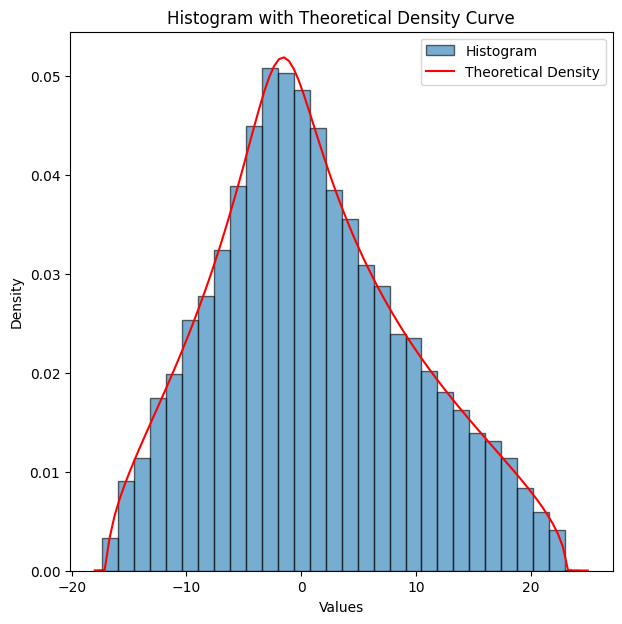

In [ ]:
size = 200
lam = 4
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  A = random_semicircle(size)
  B = random_fpoisson(size, lam)
  e = la.eigvalsh(A @ B + B @ A + A @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 5c. Another deformed anticommutator.

Here we considere the deformed anticommutator $$
p(X, Y) = X Y + Y X + X^2,
$$
when $X$ has the distribution $\mu_X = \frac{1}{4}(2 \delta_{-2} + \delta_{-1} + \delta_{+1})$ and $Y$ is the standard semicircle.

This is Example 10.4. from Speicher LN on Non-commutative distributions.

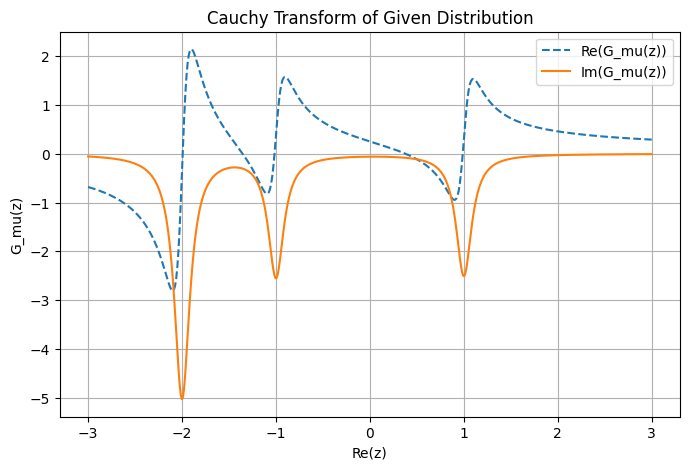

In [ ]:
def cauchy_transform_custom(z):
    """
    Computes the Cauchy transform G_mu(z) of the measure
    mu_X = (1/4)(2δ_{-2} + δ_{-1} + δ_{+1})
    """
    return (1/4) * (2 / (z + 2) + 1 / (z + 1) + 1 / (z - 1))

# Example usage
z_values = np.linspace(-3, 3, 500) + 0.1j  # Evaluate on the upper half-plane
G_values = np.array([cauchy_transform_custom(z) for z in z_values])

# Plot real and imaginary parts
plt.figure(figsize=(8, 5))
plt.plot(z_values.real, G_values.real, label="Re(G_mu(z))", linestyle='dashed')
plt.plot(z_values.real, G_values.imag, label="Im(G_mu(z))")
plt.xlabel("Re(z)")
plt.ylabel("G_mu(z)")
plt.legend()
plt.title("Cauchy Transform of Given Distribution")
plt.grid()
plt.show()



0.15633621732591682
0.9889705543694421


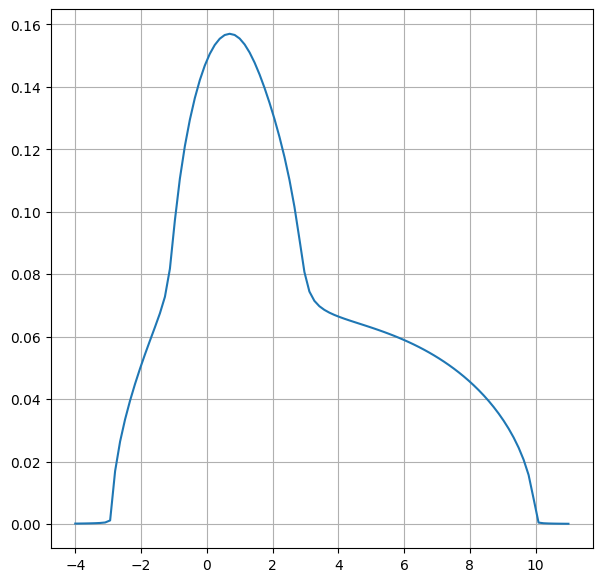

In [ ]:
def get_density_anticommutator_deform_custom(x, eps = 0.01):
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 1/2], [1, 0, 0], [1/2, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  om = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_custom",
                   H2_name = "H_matrix_semicircle",
                   H1_kwargs={"G_name":"cauchy_transform_custom"},
                   H2_kwargs={})
  Gxy = G_matrix_custom(om, A1, rank = 2, G_name="cauchy_transform_custom")
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = .5
f = get_density_anticommutator_deform_custom(x)
print(f)

#visualization
m = 100
al = -4
au = 11
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator_deform_custom(x)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Numerical Check:

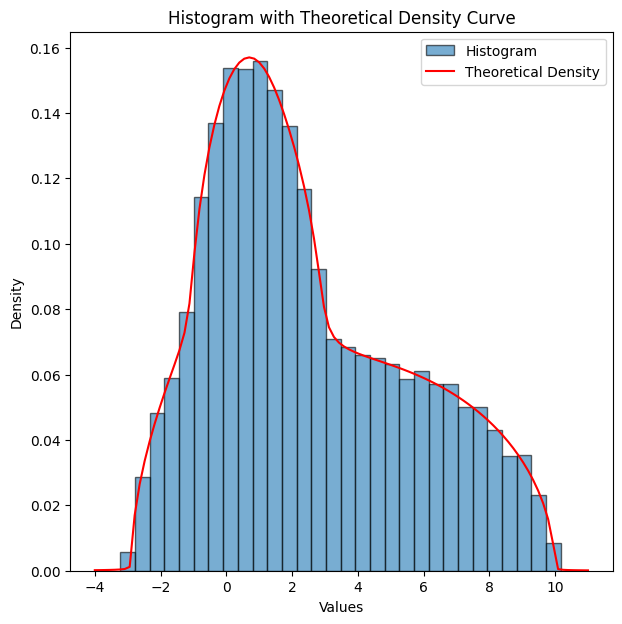

In [ ]:
size = 200
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  # Define the values for the diagonal
  diagonal_values = np.concatenate([np.full(100, -2), np.full(50, -1), np.full(50, 1)])
  A = np.diag(diagonal_values)
  B = random_semicircle(size)
  e = la.eigvalsh(A @ B + B @ A + A @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()

## Example 5.9 Yet another deformed anticommutator

Here as in previous example, $X$ has measure $\mu_X = \frac{1}{4}(2 \delta_{-2} + \delta_{-1} + \delta_{+1})$ and $Y$ has measure $\mu_Y = \frac{1}{2}(\delta_1 + \delta_3)$

Calculation using subordination function. (This is somewhat different from the result in Speicher's Lecture notes. Maybe because X and Y switch places?)

0.0017330722474011744
1.0035421215429785


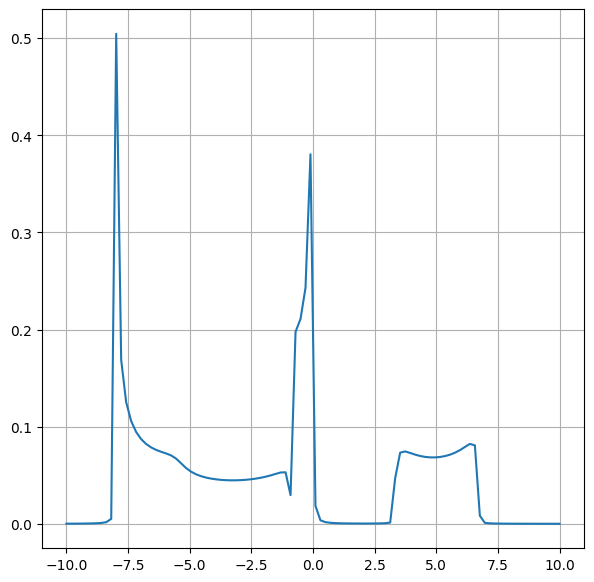

In [ ]:
def get_density_anticommutator_deform_custom2(x, eps = 0.01):
  A0 = np.array([[0, 0, 0], [0, 0, -1], [0, -1, 0]])
  A1 = np.array([[0, 1, 1/2], [1, 0, 0], [1/2, 0, 0]])
  A2 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
  AA = (A1, A2)
  n = A0.shape[0]
  z = x + eps * 1j
  B = Lambda(z, n) - A0
  om = omega_sub(B, (A1, A2), rank = (2,2), H1_name = "H_matrix_custom",
                   H2_name = "H_matrix_custom",
                   H1_kwargs={"G_name":"cauchy_transform_discrete",
                              "G_kwargs":{"points":np.array([-2, -1, 1]), "weights": np.array([2/4, 1/4, 1/4])}},
                   H2_kwargs={"G_name":"cauchy_transform_discrete",
                              "G_kwargs":{"points":np.array([1, 3]), "weights": np.array([1/2, 1/2])}})
  Gxy = G_matrix_custom(om, A1, rank = 2, G_name="cauchy_transform_discrete",
                        G_kwargs={"points":np.array([-2, -1, 1]), "weights": np.array([2/4, 1/4, 1/4])})
  f = (-1/np.pi) * Gxy[0,0].imag
  return f

x = .5
f = get_density_anticommutator_deform_custom2(x)
print(f)

#visualization
m = 100
al = -10
au = 10
XX = np.linspace(al, au, m)
f = np.zeros(XX.shape)
for i, x in enumerate(XX):
   f[i] = get_density_anticommutator_deform_custom2(x)

print(sum(f)*(au - al)/m) #just to check that the integral of the density is 1 (approximately)
plt.plot(XX, f)
plt.grid(True)

Numerical check

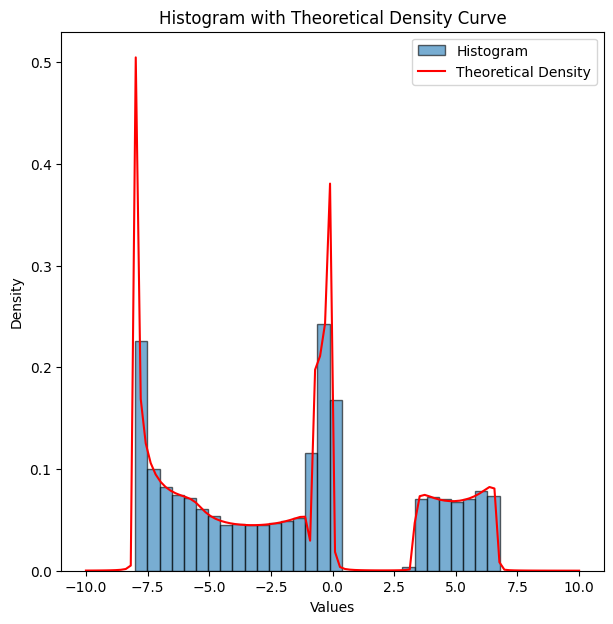

In [ ]:
size = 400
zero_m = np.zeros((size, size))
ones_m = np.eye(size)
T = 30
EE = np.zeros((size,T))
for count in range(T):
  # Define the values for the diagonal
  diagonal_values = np.concatenate([np.full(200, -2), np.full(100, -1), np.full(100, 1)])
  A = np.diag(diagonal_values)
  diagonal_values = np.concatenate([np.full(200, 1), np.full(200, 3)])
  B = np.diag(diagonal_values)
  Q = random_orthogonal(size)
  B = Q @ B @ Q.T

  e = la.eigvalsh(A @ B + B @ A + A @ A)
  EE[:,count] = e

EE = EE.reshape(-1)

plt.figure()
# Plot histogram with density
plt.hist(EE, bins=30, density=True, edgecolor='black', alpha=0.6, label="Histogram")
# Plot theoretical density curve
plt.plot(XX, f, color='red', label="Theoretical Density")

# Add labels and legend
plt.title("Histogram with Theoretical Density Curve")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()